In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# Data processing
# ====================================
import pandas as pd
import numpy as np
import math

# Plots
# ====================================
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data analysis
# ====================================
from scipy import stats

# Utils
# ====================================
from itertools import product
from collections import Counter

# Minerales fantásticos y dónde encontrarlos
Los sistemas de la nave detectan un posible candidato para planeta habitable, e inician el protocolo Phoenix para finalizar el estado de criogenización de los pasajeros.

Necesitamos analizar el planeta para determinar sus características, su habitabilidad, su clima, su abundancia de materias primas para generar combustibles, etc.
Para ello, se envía una sonda que se acerca al planeta y escanea con precisión su corteza y los minerales que se encuentran en ella, en observaciones cartográficas de 100 x 100 metros. Nuestro objetivo ahora será crear un modelo en base a los datos obtenidos por la sonda para poder determinar la composición de minerales de todo el planeta.

Descarga los datos de la sonda, analízalos, límpialos, realiza procesos de ingeniería de variables y crea un modelo para predecir el tipo de mineral, buscando maximizar el accuracy. Por último, categoriza el conjunto de test que viene incluido en la descarga de los datos y envía las predicciones de los registros en el orden original separadas por comas, de la siguiente manera:

5,2,4,3,1

El ejemplo expuesto se correspondería con las predicciones de los 5 primeros registros, tendréis que subir en una sola línea las 2,000 predicciones usando este formato.

5,2,4,3,1,5,6,3,2,5,7,3,2,4,5

## Metadata

```
Fantastic Minerals and Where to Find Them

### Context

This dataset contains information about the predominant kinds of minerals registered in a newly found planet. 
This information can be used to determine the likelihood of 100 x 100 meters cartographic observation 
of the planet being covered by a particular mineral.

### Metadata
- Number of variables: 13
- Target variable: mineralType
- Number of observations: 12621

Variable details
- temperatureFirstHalfPlanetRotation # Average temperature of the area during the first half of the planet's rotation in Farenheit
- temperatureSecondHalfPlanetRotation # Average temperature of the area during the second half of the planet's rotation in Celsius
- waterStreamDistanceX # X Distance to nearest water stream in feet
- waterStreamDistanceY # Y Distance to nearest water stream in meters
- planetSection # Planet section designation
- cover # Cover found on the surface. Note: If cover is not found, the value is 0.
- climaticZone # Climatic Zone of area ordered by their natural order
- geoZone # Geological Zone of area, no natural order
- rockSize #  Note: If rock size is not found, the value is 0.
- magmaConcentrationDistance # Distance to nearest concentration of magma, such as volcanos or high temperature areas
- mineralDensity # Density of the area underground in kg/m3
- detectionDepth # Depth of mineral detection in kilometers
- longitude # Orientation of the planet in degrees

Target variable detail:
- mineralType # Predominant variable found in the area

The Mineral Types found are:
- 1 Titanite 
- 2 Rupee
- 3 Milhousenite
- 4 Mythril Ore
- 5 Beeblebrox
- 6 Veritaserum
- 7 Pure Beskar

*More details*

The Planet Sections are:
- Mordor
- Tatoooine
- Hyrule
 
Cover types are:
- 1 cover has 0.01% to 0.1% of stones on surface
- 2 cover has 0.1% to <3% of stones on surface 
- 3 cover has 3% to <15% of stones on surface
- 4 cover has 15% to <50% of stones on surface
- 5 cover has >50% of stones on surface
- 0 no cover found

Rock sizes are:
- 1 Normal Stones
- 2 Large Mass
- 3 Broken Remains
- 0 No Rock size specified
```

## Carga de datos

In [211]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')

In [4]:
train.head()

climaticZone planetSection  temperatureSecondHalfPlanetRotation  \
0             4     Tatoooine                                 28.9   
1             7     Tatoooine                                 36.8   
2             8        Mordor                                 33.0   
3             2        Hyrule                                 25.5   
4             2        Hyrule                                 29.5   

   temperatureFirstHalfPlanetRotation  mineralDensity  geoZone  longitude  \
0                              -999.0         4617.64        7      71.86   
1                               103.0         9859.22        1     360.78   
2                               111.9         -999.00        7      37.66   
3                               108.4         -999.00        7     134.36   
4                               111.6         3991.21        7     109.15   

   rockSize  waterStreamDistanceY  cover magmaConcentrationDistance  \
0         3                 16.76      4                 VERY_CLOSE   
1         0                 12.13      0                 VERY_CLOSE   
2         1                  1.90      3                      CLOSE   
3         3                 11.89      4                      CLOSE   
4         1                  0.00      1                 VERY_CLOSE   

   waterStreamDistanceX  detectionDepth  mineralType  id  
0                857.70           27.49            5   0  
1                103.28           27.30            1   1  
2                102.74           32.25            7   2  
3                135.40           22.35            4   3  
4                  0.00           23.19            4   4

In [5]:
test.head()

climaticZone planetSection  temperatureSecondHalfPlanetRotation  \
0             7        Mordor                                 38.5   
1             4        Hyrule                                 32.8   
2             8        Mordor                                 28.9   
3             4        Hyrule                                 32.9   
4             8        Mordor                                 30.2   

   temperatureFirstHalfPlanetRotation  mineralDensity  geoZone  longitude  \
0                               101.4        11991.84        7     341.76   
1                               100.3        10393.00        7      18.63   
2                               104.3         5384.38        7      53.95   
3                               108.1         6383.95        7      36.91   
4                               102.0         4785.65        7      40.08   

   rockSize  waterStreamDistanceY  cover magmaConcentrationDistance  \
0         1                162.56      3                 VERY_CLOSE   
1         3                 58.05      4                 VERY_CLOSE   
2         1                  3.96      3                      CLOSE   
3         3                 95.56      4                 VERY_CLOSE   
4         1                  4.00      3                     MEDIUM   

   waterStreamDistanceX  detectionDepth  id  
0               1306.21           27.93   0  
1                563.96           23.00   1  
2                515.45           32.46   2  
3                689.62           24.07   3  
4                102.68           34.01   4

In [6]:
train.describe()

climaticZone  temperatureSecondHalfPlanetRotation  \
count  12621.000000                         12621.000000   
mean       5.145947                            28.498011   
std        2.224898                             6.384125   
min        2.000000                             9.500000   
25%        4.000000                            24.500000   
50%        6.000000                            28.900000   
75%        7.000000                            32.900000   
max        8.000000                            45.700000   

       temperatureFirstHalfPlanetRotation  mineralDensity       geoZone  \
count                        12621.000000    12621.000000  12621.000000   
mean                            49.300848     6429.971654      6.221060   
std                            239.574487     4859.709989      1.928706   
min                           -999.000000     -999.000000      1.000000   
25%                             99.100000     3573.420000      7.000000   
50%                            104.000000     6688.830000      7.000000   
75%                            108.600000     9841.940000      7.000000   
max                            118.400000    22478.670000      7.000000   

          longitude      rockSize  waterStreamDistanceY         cover  \
count  12621.000000  12621.000000          12621.000000  12621.000000   
mean     150.497032      1.573409             51.023482      2.786467   
std       96.298261      1.085754             61.035505      1.315744   
min        0.980000      0.000000           -136.830000      0.000000   
25%       75.650000      1.000000              4.890000      3.000000   
50%      136.100000      1.000000             32.230000      3.000000   
75%      210.770000      3.000000             79.350000      4.000000   
max      367.110000      3.000000            572.140000      4.000000   

       waterStreamDistanceX  detectionDepth   mineralType            id  
count          12621.000000    12621.000000  12621.000000  12621.000000  
mean             735.904599       27.337719      3.997861   6310.000000  
std              685.087360        4.195630      1.970884   3643.513208  
min                0.000000       18.160000      1.000000      0.000000  
25%              209.970000       23.710000      2.000000   3155.000000  
50%              577.240000       27.290000      4.000000   6310.000000  
75%             1056.170000       30.700000      6.000000   9465.000000  
max             4386.000000       40.010000      7.000000  12620.000000

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12621 entries, 0 to 12620
Data columns (total 15 columns):
climaticZone                           12621 non-null int64
planetSection                          12621 non-null object
temperatureSecondHalfPlanetRotation    12621 non-null float64
temperatureFirstHalfPlanetRotation     12621 non-null float64
mineralDensity                         12621 non-null float64
geoZone                                12621 non-null int64
longitude                              12621 non-null float64
rockSize                               12621 non-null int64
waterStreamDistanceY                   12621 non-null float64
cover                                  12621 non-null int64
magmaConcentrationDistance             12621 non-null object
waterStreamDistanceX                   12621 non-null float64
detectionDepth                         12621 non-null float64
mineralType                            12621 non-null int64
id                                 

In [8]:
test.describe()

climaticZone  temperatureSecondHalfPlanetRotation  \
count   2000.000000                          2000.000000   
mean       5.117500                            28.466100   
std        2.185196                             6.431907   
min        2.000000                             9.600000   
25%        4.000000                            24.500000   
50%        6.000000                            28.700000   
75%        7.000000                            32.900000   
max        8.000000                            44.100000   

       temperatureFirstHalfPlanetRotation  mineralDensity      geoZone  \
count                          2000.00000     2000.000000  2000.000000   
mean                             54.13040     6439.877570     6.151500   
std                             228.75613     4927.163534     2.017569   
min                            -999.00000     -999.000000     1.000000   
25%                              99.00000     3525.607500     7.000000   
50%                             103.85000     6664.210000     7.000000   
75%                             108.40000    10033.055000     7.000000   
max                             118.30000    21356.990000     7.000000   

         longitude     rockSize  waterStreamDistanceY        cover  \
count  2000.000000  2000.000000           2000.000000  2000.000000   
mean    150.057770     1.580500             50.121075     2.773000   
std      97.257776     1.105048             60.444615     1.349586   
min       0.980000     0.000000           -103.120000     0.000000   
25%      75.062500     1.000000              3.890000     3.000000   
50%     134.500000     1.000000             32.040000     3.000000   
75%     207.290000     3.000000             77.425000     4.000000   
max     366.900000     3.000000            411.440000     4.000000   

       waterStreamDistanceX  detectionDepth           id  
count           2000.000000     2000.000000  2000.000000  
mean             719.683445       27.083085   999.500000  
std              680.974945        4.134262   577.494589  
min                0.000000       17.980000     0.000000  
25%              192.630000       23.520000   499.750000  
50%              564.105000       27.165000   999.500000  
75%             1060.482500       30.182500  1499.250000  
max             4073.820000       38.680000  1999.000000

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
climaticZone                           2000 non-null int64
planetSection                          2000 non-null object
temperatureSecondHalfPlanetRotation    2000 non-null float64
temperatureFirstHalfPlanetRotation     2000 non-null float64
mineralDensity                         2000 non-null float64
geoZone                                2000 non-null int64
longitude                              2000 non-null float64
rockSize                               2000 non-null int64
waterStreamDistanceY                   2000 non-null float64
cover                                  2000 non-null int64
magmaConcentrationDistance             2000 non-null object
waterStreamDistanceX                   2000 non-null float64
detectionDepth                         2000 non-null float64
id                                     2000 non-null int64
dtypes: float64(7), int64(5), object(2)
memory usag

Pasos a realizar --> Exploratory Data Analysis - Data Visualization - Data Preprocessing - Feature Engineering - Modeling - Evaluation - Tuning - Deployment

# Missing values

In [10]:
train.isna().sum()

climaticZone                           0
planetSection                          0
temperatureSecondHalfPlanetRotation    0
temperatureFirstHalfPlanetRotation     0
mineralDensity                         0
geoZone                                0
longitude                              0
rockSize                               0
waterStreamDistanceY                   0
cover                                  0
magmaConcentrationDistance             0
waterStreamDistanceX                   0
detectionDepth                         0
mineralType                            0
id                                     0
dtype: int64

In [11]:
test.isna().sum()

climaticZone                           0
planetSection                          0
temperatureSecondHalfPlanetRotation    0
temperatureFirstHalfPlanetRotation     0
mineralDensity                         0
geoZone                                0
longitude                              0
rockSize                               0
waterStreamDistanceY                   0
cover                                  0
magmaConcentrationDistance             0
waterStreamDistanceX                   0
detectionDepth                         0
id                                     0
dtype: int64

Ninguno de los 2 conjuntos tiene missing values que imputar.

# Exploratory Data Analysis (EDA) y Data Visualization

In [12]:
def boxplot_univariate_features(df, features, title):
    for col in features:
        print(col)
        fig = plt.figure(figsize=(9, 3))
        sns.boxplot(x=df[col])
        plt.title(title)
        plt.show()
        fig.clf()

def histplot_univariate_features(df, features, title, hue=None):
    for col in features:
        print(col)
        fig = plt.figure(figsize=(9, 3))
        sns.histplot(data=df, x=col, kde=True, hue=hue)
        plt.title(title)
        plt.show()
        fig.clf()

In [13]:
numerical_variables = []
categorical_variables = []

for col in train.columns:
    if train[col].dtype == 'int64' or train[col].dtype == 'float64':
        numerical_variables.append(col)
    elif train[col].dtype == 'object':
        categorical_variables.append(col)

## Variables numéricas

### Train set

climaticZone


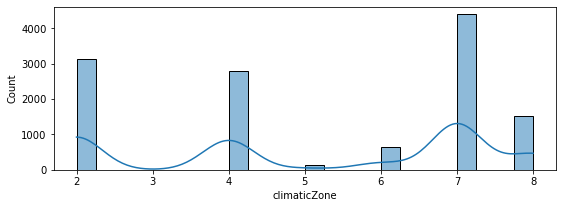

temperatureSecondHalfPlanetRotation


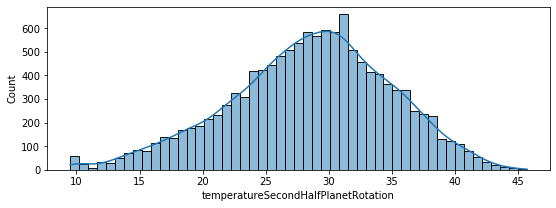

temperatureFirstHalfPlanetRotation


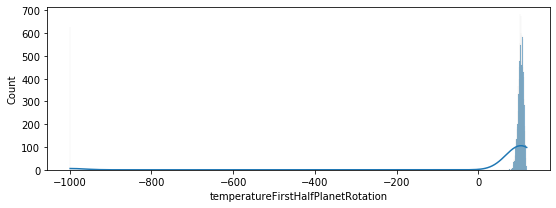

mineralDensity


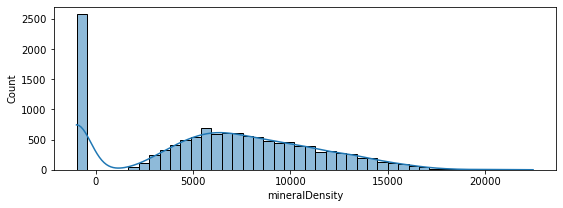

geoZone


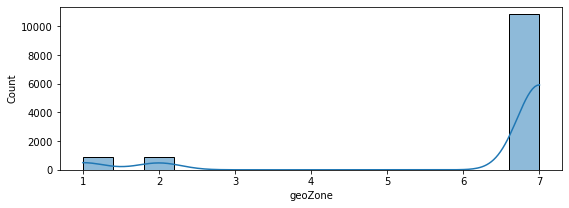

longitude


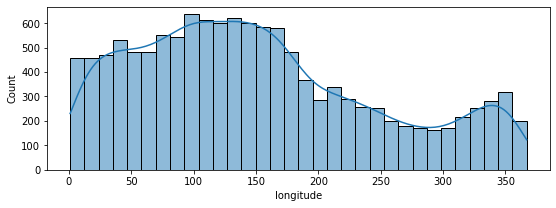

rockSize


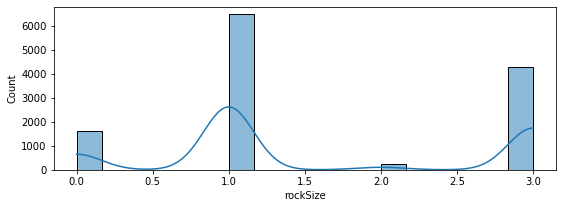

waterStreamDistanceY


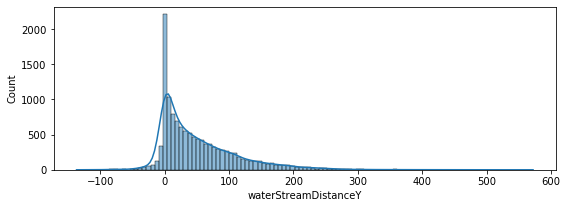

cover


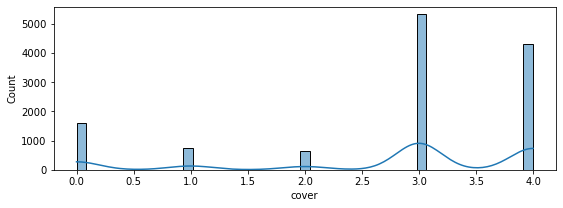

waterStreamDistanceX


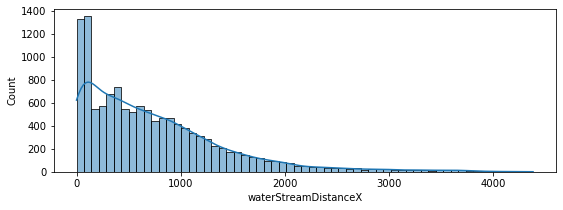

detectionDepth


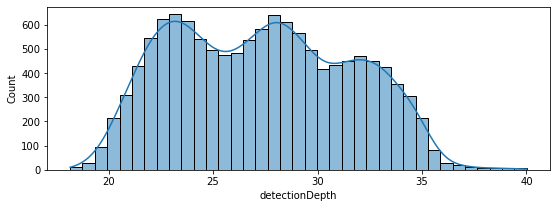

mineralType


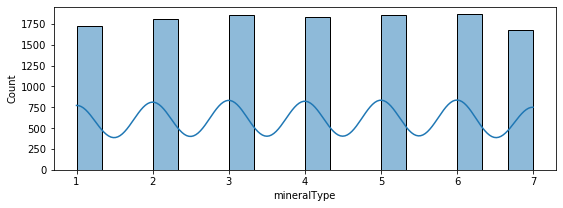

id


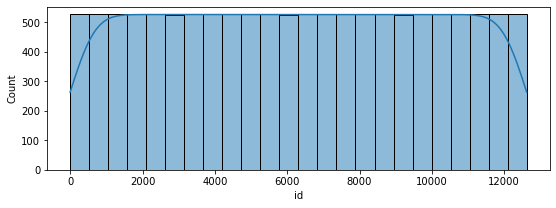

In [14]:
histplot_univariate_features(train, numerical_variables, '')

climaticZone


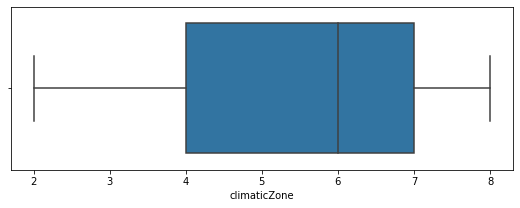

temperatureSecondHalfPlanetRotation


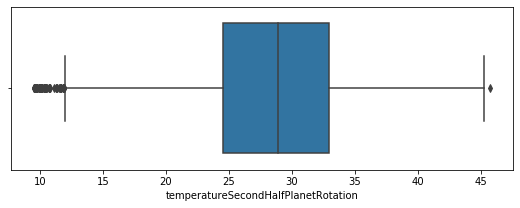

temperatureFirstHalfPlanetRotation


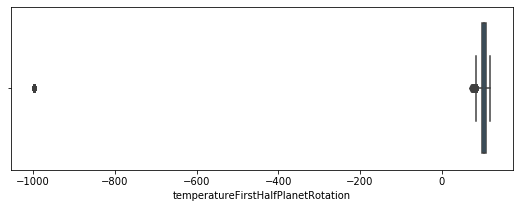

mineralDensity


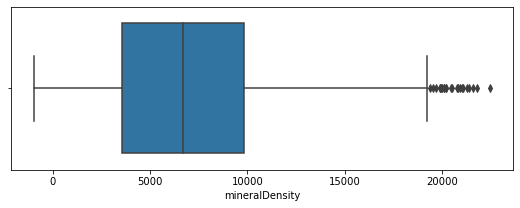

geoZone


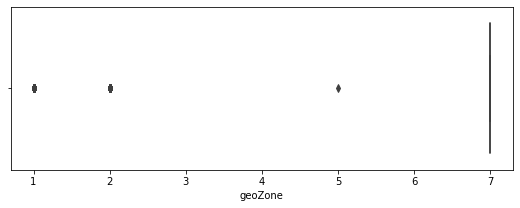

longitude


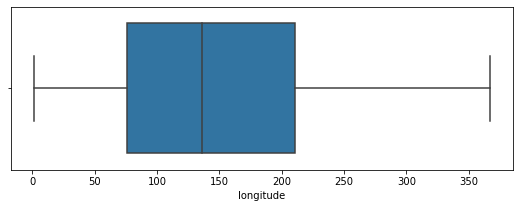

rockSize


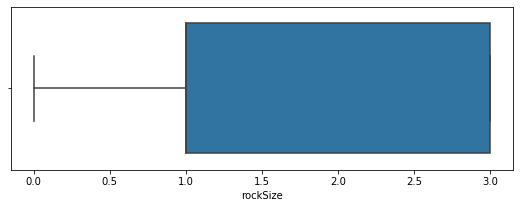

waterStreamDistanceY


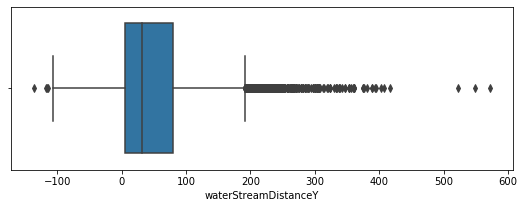

cover


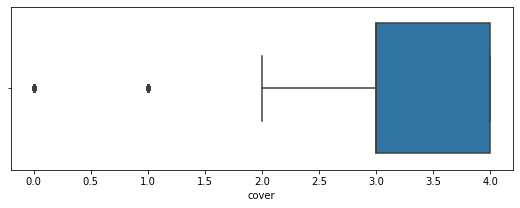

waterStreamDistanceX


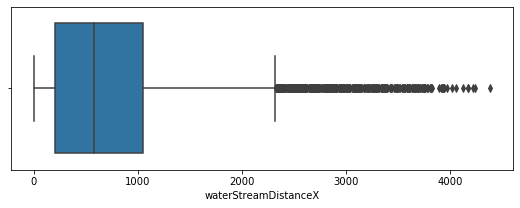

detectionDepth


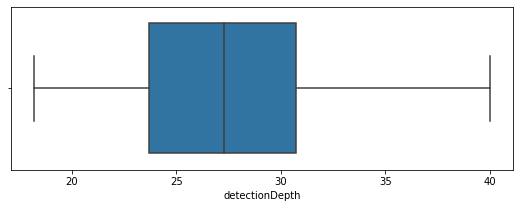

mineralType


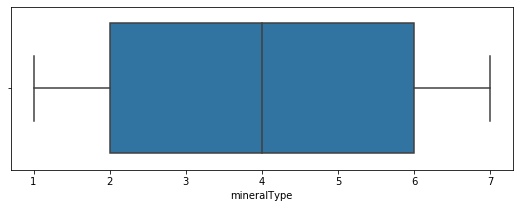

id


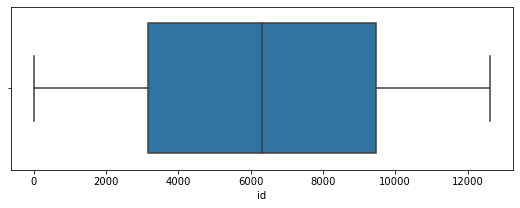

In [15]:
boxplot_univariate_features(train, numerical_variables, '')

- climaticZone:

In [16]:
train['climaticZone'].value_counts()

7    4386
2    3116
4    2798
8    1522
6     652
5     146
3       1
Name: climaticZone, dtype: int64

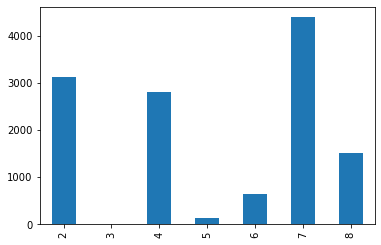

In [96]:
train['climaticZone'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [97]:
test['climaticZone'].value_counts()

7    692
2    482
4    461
8    208
6    134
5     23
Name: climaticZone, dtype: int64

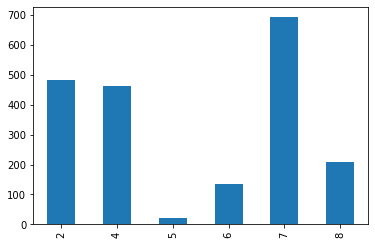

In [98]:
test['climaticZone'].value_counts().sort_index().plot(kind='bar')
plt.show()

- temperatureFirstHalfPlanetRotation:

Estudiamos la distribución con la conversión a Celsius.

In [18]:
train_copy = train.copy()

In [19]:
fahrenheit_to_celsius = lambda f: (f - 32) / 1.8

temperatureFirstHalfPlanetRotation


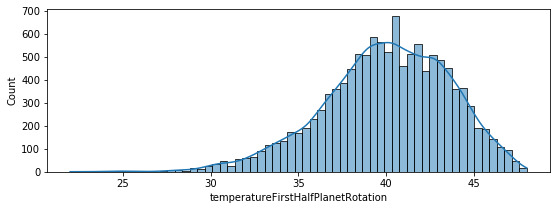

temperatureFirstHalfPlanetRotation


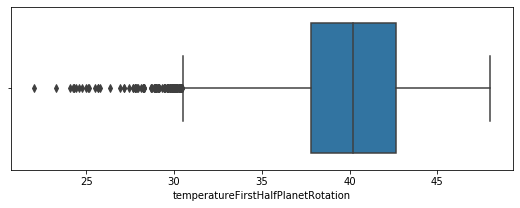

In [20]:
train_copy['temperatureFirstHalfPlanetRotation'] = train_copy['temperatureFirstHalfPlanetRotation'].replace(-999.0, np.nan)
train_copy['temperatureFirstHalfPlanetRotation'] = train_copy['temperatureFirstHalfPlanetRotation'].apply(fahrenheit_to_celsius)
histplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')
boxplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')

In [21]:
train_copy['temperatureFirstHalfPlanetRotation'].describe()

count    11995.000000
mean        40.005558
std          3.592235
min         22.000000
25%         37.777778
50%         40.222222
75%         42.666667
max         48.000000
Name: temperatureFirstHalfPlanetRotation, dtype: float64

Los datos tienen sentido con respecto a su naturaleza, por lo que no necesitaría ningún otro tratamiento más allá que los valores de -999.0

Estudiamos los casos con temperatureFirstHalfPlanetRotation = -999.0 y estudiamos posibles métodos de imputación para este valor.

In [22]:
train[train['temperatureFirstHalfPlanetRotation']==-999.0]

climaticZone planetSection  temperatureSecondHalfPlanetRotation  \
0                 4     Tatoooine                                 28.9   
87                7     Tatoooine                                 24.9   
89                2     Tatoooine                                 22.9   
96                8     Tatoooine                                 35.0   
105               2        Hyrule                                 32.0   
...             ...           ...                                  ...   
12545             2        Hyrule                                 36.3   
12555             7        Mordor                                 25.0   
12558             2        Hyrule                                 25.2   
12566             4     Tatoooine                                 20.3   
12590             7        Mordor                                 30.4   

       temperatureFirstHalfPlanetRotation  mineralDensity  geoZone  longitude  \
0                                  -999.0         4617.64        7      71.86   
87                                 -999.0         6482.25        7      97.76   
89                                 -999.0         -999.00        7     184.87   
96                                 -999.0         7328.77        7       4.06   
105                                -999.0         2316.98        7       9.17   
...                                   ...             ...      ...        ...   
12545                              -999.0         8461.31        7     342.57   
12555                              -999.0         -999.00        7     141.81   
12558                              -999.0        10666.21        7     187.18   
12566                              -999.0         9339.19        7     150.76   
12590                              -999.0         8291.16        7      42.74   

       rockSize  waterStreamDistanceY  cover magmaConcentrationDistance  \
0             3                 16.76      4                 VERY_CLOSE   
87            1                 12.55      3                      CLOSE   
89            3                 37.88      4                     MEDIUM   
96            1                 53.90      3                 VERY_CLOSE   
105           1                 52.85      1                      CLOSE   
...         ...                   ...    ...                        ...   
12545         3                 58.91      4                 VERY_CLOSE   
12555         1                 14.83      3                      CLOSE   
12558         3                 37.16      4                 VERY_CLOSE   
12566         3                198.21      4                      CLOSE   
12590         1                 24.55      3                      CLOSE   

       waterStreamDistanceX  detectionDepth  mineralType     id  
0                    857.70           27.49            5      0  
87                   293.99           27.57            3     87  
89                   424.14           27.08            3     89  
96                  1622.55           33.53            7     96  
105                 1108.11           23.90            3    105  
...                     ...             ...          ...    ...  
12545                541.07           22.25            6  12545  
12555                427.05           29.57            2  12555  
12558                315.71           23.04            3  12558  
12566               1969.09           28.21            3  12566  
12590               1236.69           30.32            5  12590  

[626 rows x 15 columns]

In [23]:
train[(train['temperatureFirstHalfPlanetRotation'] == -999.0) & (train['mineralDensity'] == -999.0)]

climaticZone planetSection  temperatureSecondHalfPlanetRotation  \
89                2     Tatoooine                                 22.9   
293               4     Tatoooine                                 22.5   
309               6     Tatoooine                                 31.4   
371               8     Tatoooine                                 31.1   
383               6        Mordor                                 27.1   
...             ...           ...                                  ...   
12347             6        Hyrule                                 34.3   
12451             8     Tatoooine                                 37.5   
12470             7        Mordor                                 26.2   
12477             7        Mordor                                 26.0   
12555             7        Mordor                                 25.0   

       temperatureFirstHalfPlanetRotation  mineralDensity  geoZone  longitude  \
89                                 -999.0          -999.0        7     184.87   
293                                -999.0          -999.0        7     147.60   
309                                -999.0          -999.0        1      60.62   
371                                -999.0          -999.0        7      45.49   
383                                -999.0          -999.0        1     155.17   
...                                   ...             ...      ...        ...   
12347                              -999.0          -999.0        1      15.80   
12451                              -999.0          -999.0        7     308.51   
12470                              -999.0          -999.0        7     110.58   
12477                              -999.0          -999.0        7     142.03   
12555                              -999.0          -999.0        7     141.81   

       rockSize  waterStreamDistanceY  cover magmaConcentrationDistance  \
89            3                 37.88      4                     MEDIUM   
293           3                 12.57      4                      CLOSE   
309           0                 22.21      0                 VERY_CLOSE   
371           1                 43.42      3                 VERY_CLOSE   
383           0                  4.06      0                        FAR   
...         ...                   ...    ...                        ...   
12347         0                  0.00      0                      CLOSE   
12451         1                 18.74      3                     MEDIUM   
12470         1                 19.84      3                        FAR   
12477         1                 22.82      3                 VERY_CLOSE   
12555         1                 14.83      3                      CLOSE   

       waterStreamDistanceX  detectionDepth  mineralType     id  
89                   424.14           27.08            3     89  
293                  223.76           29.90            1    293  
309                 1239.55           25.64            5    309  
371                  576.53           33.02            7    371  
383                   97.46           25.54            2    383  
...                     ...             ...          ...    ...  
12347                  0.00           22.19            4  12347  
12451                230.69           35.24            7  12451  
12470                919.29           30.36            2  12470  
12477                511.72           28.33            1  12477  
12555                427.05           29.57            2  12555  

[124 rows x 15 columns]

_NaN:_ Utilizando np.nan son ignorados por los plots y deben ser dropeados en el conjunto de entrenamiento (excepto XGBoost que acepta NaNs).

In [24]:
train_copy = train.copy()

temperatureFirstHalfPlanetRotation


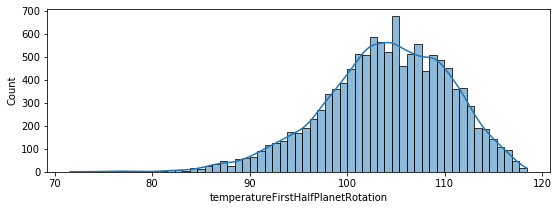

temperatureFirstHalfPlanetRotation


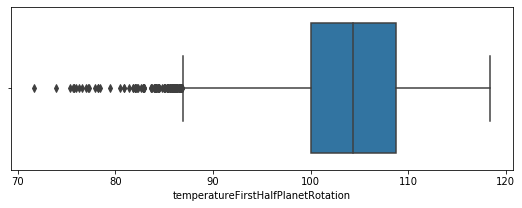

In [25]:
train_copy['temperatureFirstHalfPlanetRotation'] = train_copy['temperatureFirstHalfPlanetRotation'].replace(-999.0, np.nan)
histplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')
boxplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')

_mean:_ Imputando el valor medio conseguimos no perder información sobre el resto de variables de las entradas que toman el valor -999.0.

In [26]:
train_copy = train.copy()

In [27]:
train_copy[train_copy['temperatureFirstHalfPlanetRotation']!=-999.0]['temperatureFirstHalfPlanetRotation'].mean()

104.0100041684035

temperatureFirstHalfPlanetRotation


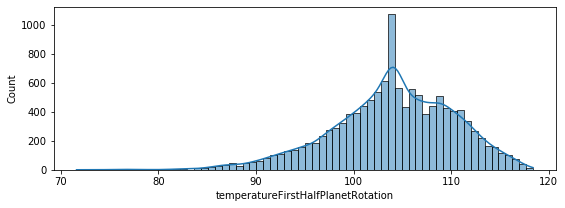

temperatureFirstHalfPlanetRotation


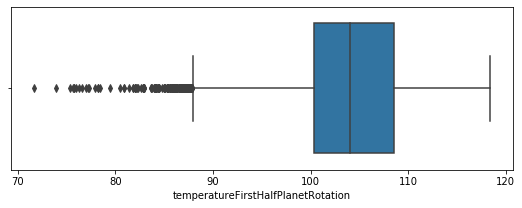

In [28]:
train_copy['temperatureFirstHalfPlanetRotation'] = train_copy['temperatureFirstHalfPlanetRotation'].replace(-999.0, train_copy[train_copy['temperatureFirstHalfPlanetRotation']!=-999.0]['temperatureFirstHalfPlanetRotation'].mean())
histplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')
boxplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')

_median:_

In [29]:
train_copy = train.copy()

In [30]:
train_copy[train_copy['temperatureFirstHalfPlanetRotation']!=-999.0]['temperatureFirstHalfPlanetRotation'].median()

104.4

temperatureFirstHalfPlanetRotation


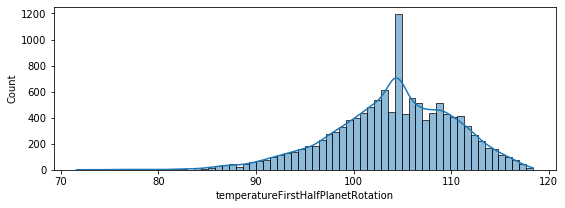

temperatureFirstHalfPlanetRotation


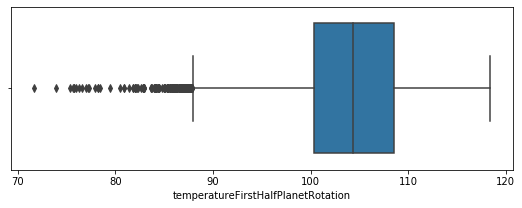

In [31]:
train_copy['temperatureFirstHalfPlanetRotation'] = train_copy['temperatureFirstHalfPlanetRotation'].replace(-999.0, train_copy[train_copy['temperatureFirstHalfPlanetRotation']!=-999.0]['temperatureFirstHalfPlanetRotation'].median())
histplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')
boxplot_univariate_features(train_copy, ['temperatureFirstHalfPlanetRotation'], '')

La imputación con mean o median es practicamente equivalente en lo que respecta a la distribución de la variable (analizar los resultados con modelos).

- mineralDensity:

Fuente con densidades para distintos minerales: https://www.engineeringtoolbox.com/mineral-density-d_1555.html (aunque la variable esta referida al área de suelo sirve para considerar rangos normales para distintos minerales típicos)

In [32]:
train['mineralDensity']

0         4617.64
1         9859.22
2         -999.00
3         -999.00
4         3991.21
           ...   
12616    10576.29
12617     6457.13
12618     -999.00
12619    10078.16
12620    14438.20
Name: mineralDensity, Length: 12621, dtype: float64

In [33]:
train_copy = train.copy()

In [34]:
train_copy['mineralDensity'] = train_copy['mineralDensity'].replace(-999.0, np.nan)
train_copy['mineralDensity'].describe()

count    10048.000000
mean      8332.314814
std       3451.350870
min       1575.780000
25%       5682.470000
50%       7860.600000
75%      10678.790000
max      22478.670000
Name: mineralDensity, dtype: float64

Estudiamos los casos con mineralDensity = -999.0 y estudiamos posibles métodos de imputación para este valor.

In [35]:
len(train[train['mineralDensity']==-999.0])

2573

In [36]:
train_copy = train.copy()

mineralDensity


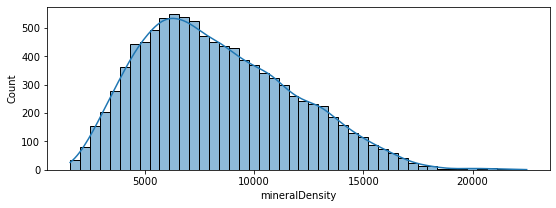

mineralDensity


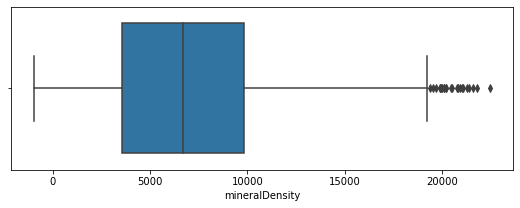

In [37]:
train_copy['mineralDensity'] = train_copy['mineralDensity'].replace(-999.0, np.nan)
histplot_univariate_features(train_copy, ['mineralDensity'], '')
boxplot_univariate_features(train, ['mineralDensity'], '')

_mean_: Imputando el valor medio conseguimos no perder información sobre el resto de variables de las entradas que toman el valor -999.0.

In [38]:
train_copy = train.copy()

In [39]:
train_copy[train_copy['mineralDensity']!=-999.0]['mineralDensity'].mean()

8332.314813893312

mineralDensity


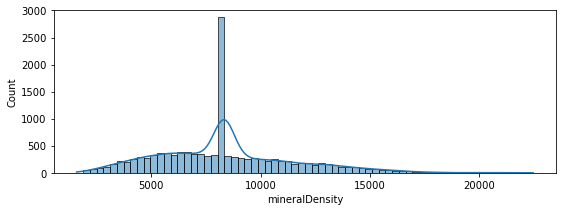

mineralDensity


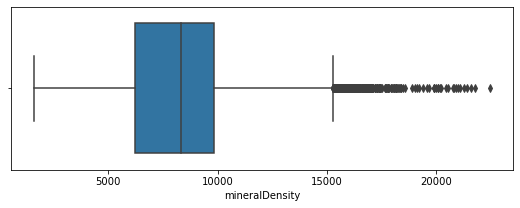

In [40]:
train_copy['mineralDensity'] = train_copy['mineralDensity'].replace(-999.0, train_copy[train_copy['mineralDensity']!=-999.0]['mineralDensity'].mean())
histplot_univariate_features(train_copy, ['mineralDensity'], '')
boxplot_univariate_features(train_copy, ['mineralDensity'], '')

En este caso imputar el valor medio o mediano rompe la distribución de la variable. Puede que en este caso produzca el mismo efecto que tenerlo como un valor erróneo o atípico ya que puede sesgar el modelo, siendo mejor directamente eliminar las entradas.

_KNNImputer_: Imputation for completing missing values using k-Nearest Neighbors (también multivariate)

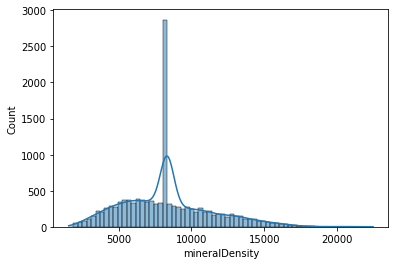

In [226]:
from sklearn.impute import KNNImputer

knn_mineralDensity = pd.DataFrame( KNNImputer(missing_values=-999.0, n_neighbors=10, weights="distance").fit_transform(train['mineralDensity'].values.reshape(len(train['mineralDensity']), 1)) , columns=['mineralDensity'])
sns.histplot(data=knn_mineralDensity, x='mineralDensity', kde=True)
plt.show()

_IterativeImputer:_ Multivariate imputer that estimates each feature from all the others.

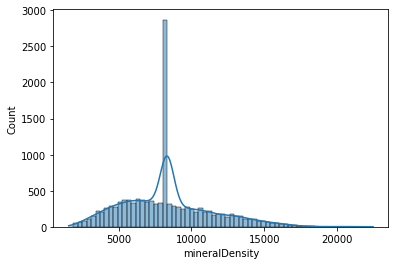

In [231]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterativeImputer_mineralDensity = pd.DataFrame( IterativeImputer(missing_values=-999.0).fit_transform(train['mineralDensity'].values.reshape(len(train['mineralDensity']), 1)) , columns=['mineralDensity'])
sns.histplot(data=iterativeImputer_mineralDensity, x='mineralDensity', kde=True)
plt.show()

In [227]:
knn_mineralDensity

mineralDensity
0         4617.640000
1         9859.220000
2         8332.314814
3         8332.314814
4         3991.210000
...               ...
12616    10576.290000
12617     6457.130000
12618     8332.314814
12619    10078.160000
12620    14438.200000

[12621 rows x 1 columns]

In [228]:
train['mineralDensity']

0         4617.64
1         9859.22
2         -999.00
3         -999.00
4         3991.21
           ...   
12616    10576.29
12617     6457.13
12618     -999.00
12619    10078.16
12620    14438.20
Name: mineralDensity, Length: 12621, dtype: float64

- geoZone:

In [41]:
train['geoZone'].value_counts()

7    10836
1      909
2      875
5        1
Name: geoZone, dtype: int64

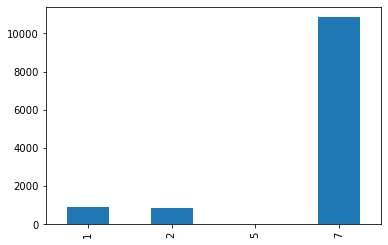

In [109]:
train['geoZone'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [110]:
test['geoZone'].value_counts()

7    1697
1     182
2     121
Name: geoZone, dtype: int64

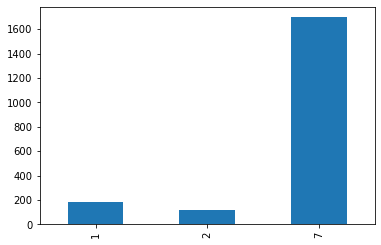

In [111]:
test['geoZone'].value_counts().sort_index().plot(kind='bar')
plt.show()

Por el metadata no sabemos que valores debería tomar, por lo que asumimos que son solo los presentes. Deberíamos encodearlos en categorías cuya representación sea un valor numérico más bajo.

Por otro lado, el caso de la única entrada con categoría 5 hay que hardcodearlo cuando hagamos el encoding pertinente.

- rockSize:

In [43]:
train['rockSize'].value_counts()

1    6467
3    4291
0    1604
2     259
Name: rockSize, dtype: int64

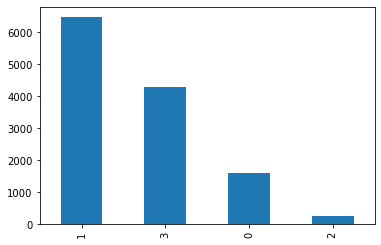

In [44]:
train['rockSize'].value_counts().plot(kind='bar')
plt.show()

> Rock sizes are:
> - 1 Normal Stones
> - 2 Large Mass
> - 3 Broken Remains
> - 0 No Rock size specified

Aunque no diga nada de que las variables tengan algún orden, es natural pensar algo como que: no size < broken remains < normal < large.

No podemos asumir que no tenga orden directamente por esto y debemos probar los dos casos (precisamente por no poder asumir que no lo tenga dada su naturaleza).

- waterStreamDistanceY:

In [45]:
train['waterStreamDistanceY'].describe()

count    12621.000000
mean        51.023482
std         61.035505
min       -136.830000
25%          4.890000
50%         32.230000
75%         79.350000
max        572.140000
Name: waterStreamDistanceY, dtype: float64

In [46]:
def remove_outliers(df, column):
    return df[(np.abs(stats.zscore(df[column])) < 3)]

waterStreamDistanceY


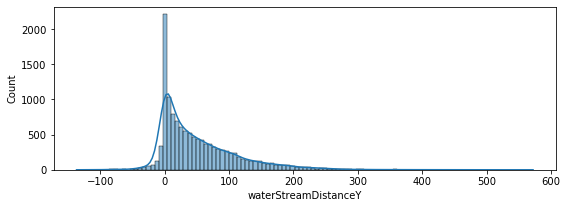

waterStreamDistanceY


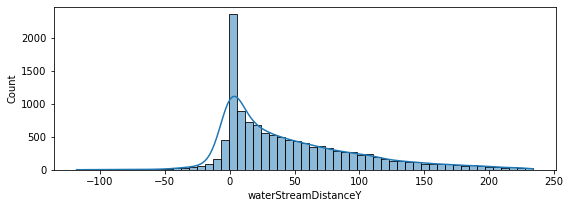

In [47]:
histplot_univariate_features(train, ['waterStreamDistanceY'], '')
histplot_univariate_features(remove_outliers(train, 'waterStreamDistanceY'), ['waterStreamDistanceY'], '')

El hecho de que la variable waterStreamDistanceX no tenga valores negativos y waterStreamDistanceY sí me hace dudar de sí son correctos y puede que la escala este mal. 

- cover:

In [48]:
train['cover'].value_counts()

3    5313
4    4291
0    1604
1     761
2     652
Name: cover, dtype: int64

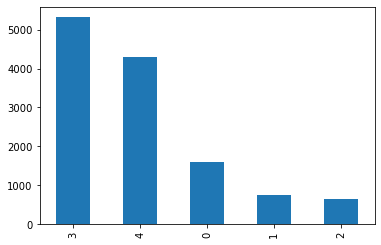

In [49]:
train['cover'].value_counts().plot(kind='bar')
plt.show()

> Cover types are:
> - 1 cover has 0.01% to 0.1% of stones on surface
> - 2 cover has 0.1% to <3% of stones on surface 
> - 3 cover has 3% to <15% of stones on surface
> - 4 cover has 15% to <50% of stones on surface
> - 5 cover has >50% of stones on surface
> - 0 no cover found

Esta variable puede que deba quedarse así sin ningún tipo de encoding ya que tiene rangos.

- waterStreamDistanceX:

In [50]:
feet_to_meters = lambda f: f * 0.3048

In [51]:
train_copy = train.copy()

In [52]:
train_copy['waterStreamDistanceX'] = feet_to_meters(train_copy['waterStreamDistanceX'])
train_copy['waterStreamDistanceX'].describe()

count    12621.000000
mean       224.303722
std        208.814627
min          0.000000
25%         63.998856
50%        175.942752
75%        321.920616
max       1336.852800
Name: waterStreamDistanceX, dtype: float64

**Conclusiones:**
- climaticZone: Hay desbalanceo para la variable. En el caso 3 solo existe una entrada.
- temperatureSecondHalfPlanetRotation: No presenta valores atípicos, nada raro aparente.
- temperatureFirstHalfPlanetRotation: Cuenta con outliers que podemos ver tanto en su boxplot como en su histograma. Todos ellos toman valor -999.00, por lo que puede tratarse de un error de medición.
- mineralDensity: Esta variable vuelve a tomar un valor extraño de -999.00 además de presentar algunos posibles atípicos en la parte derecha del rango de valores. Excluyendo las entradas con -999.00 sigue contando con valores atípicos en la zona derecha.
- geoZone: Está muy desbalanceada, además de contar con una única entrada para el tipo 5.
- longitude: No presenta ningún comportamiento extrano.
- rockSize: Cierto desbalanceo pero no extremo.
- waterStreamDistanceY: Aun eliminando los valores con z-score mayor que 3 (a más/menos de 3 desviaciones estándar de la media).
- cover: Desbalanceo
- waterStreamDistanceX: En el boxplot se pueden apreciar valores atípicos.
- detectionDepth: No presenta ningún comportamiento extraño.
- mineralType: No presenta ningún comportamiento extraño.

### Test set

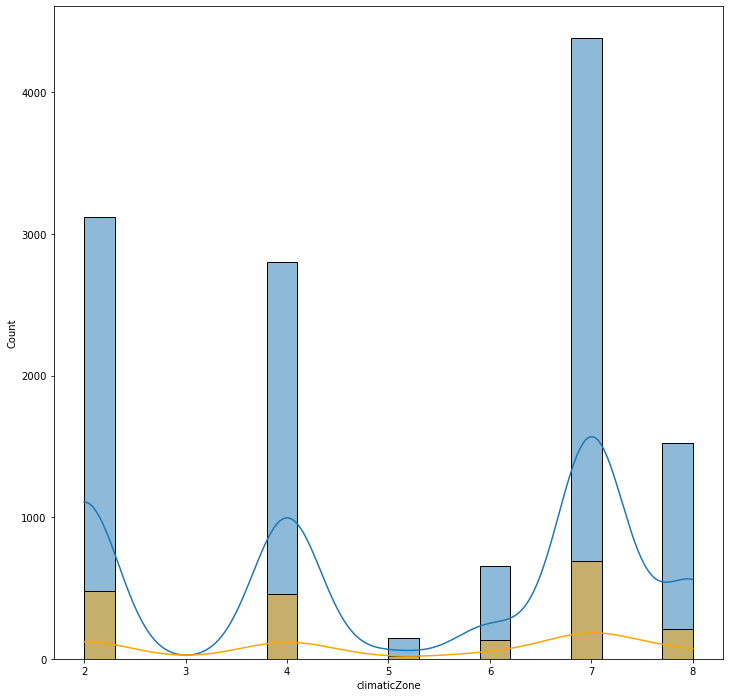

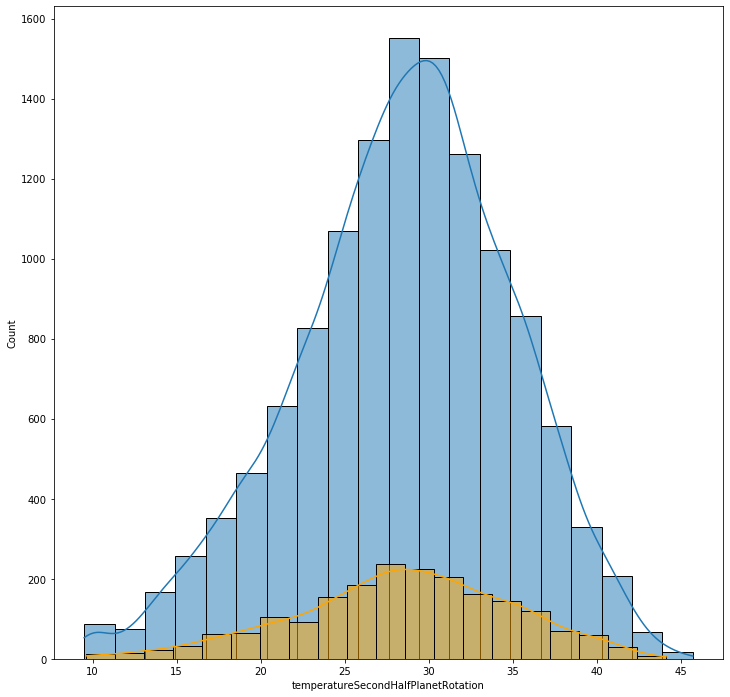

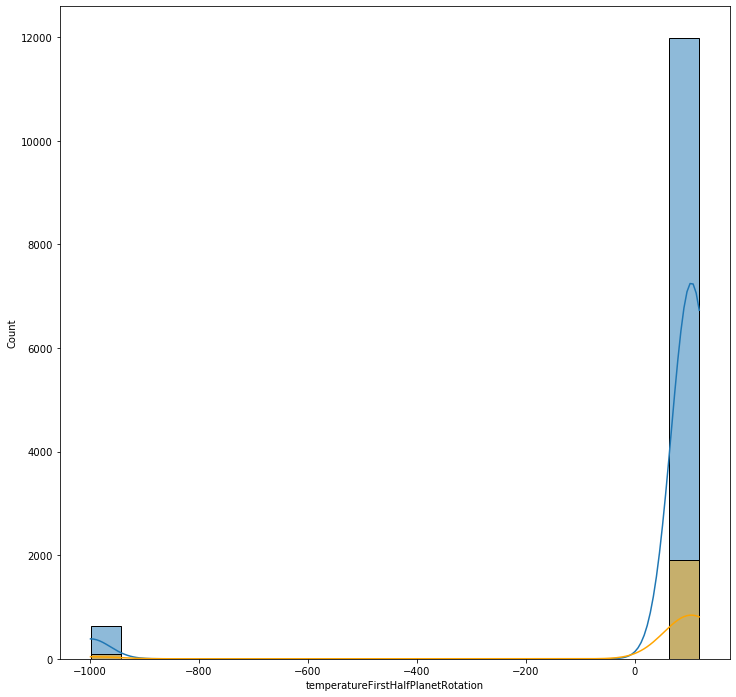

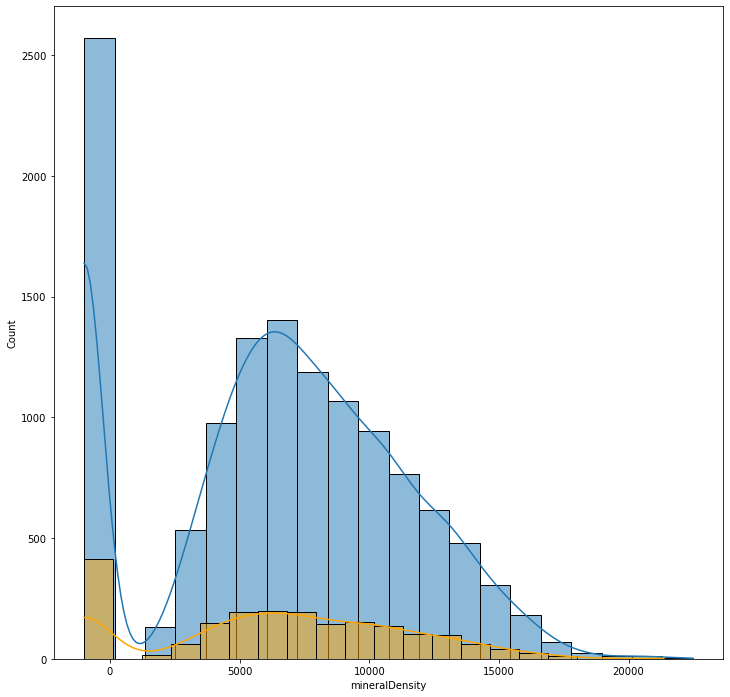

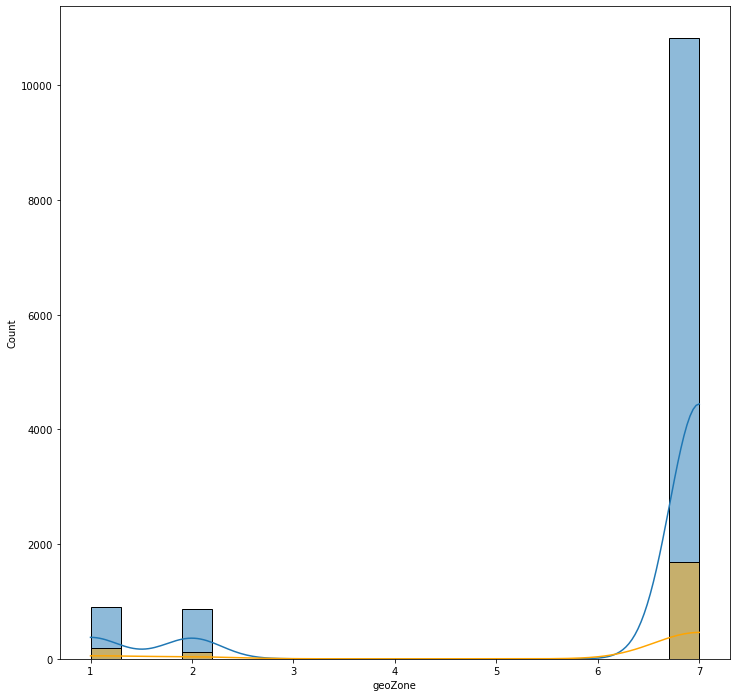

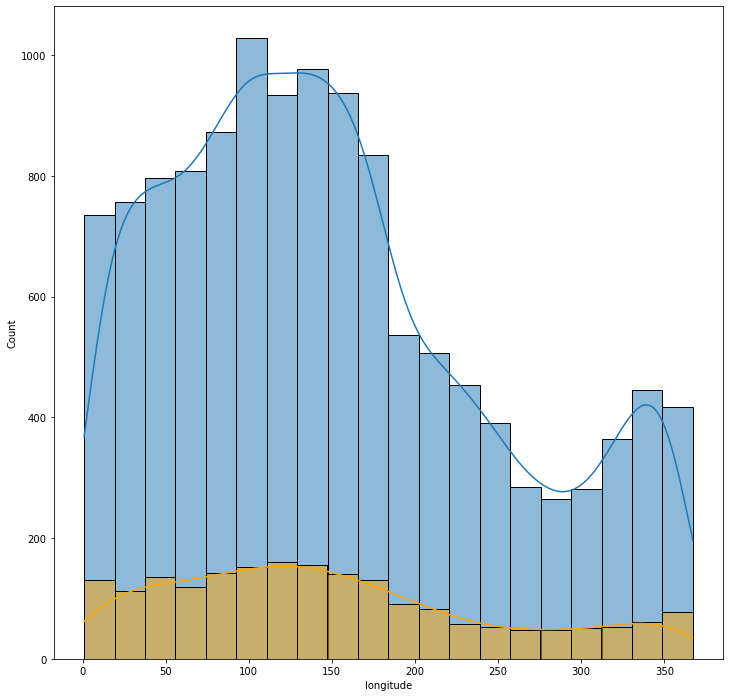

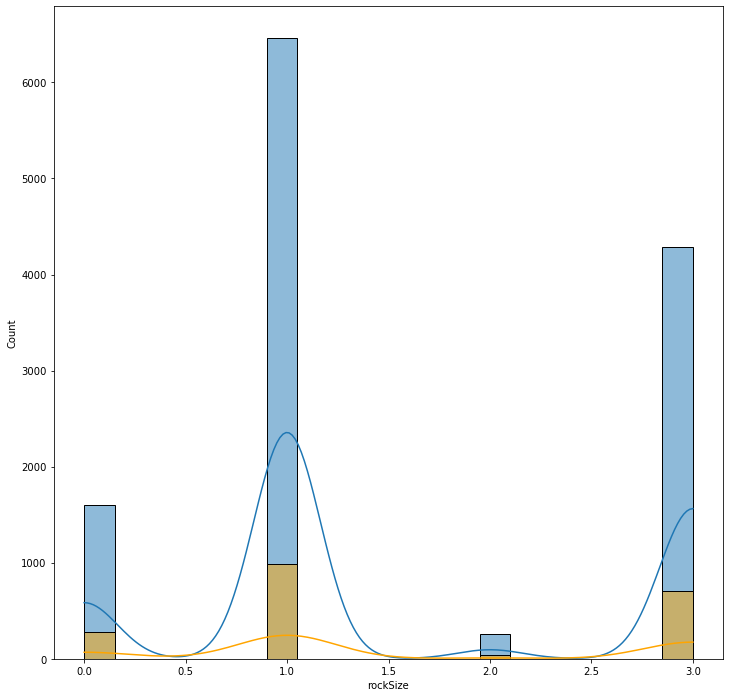

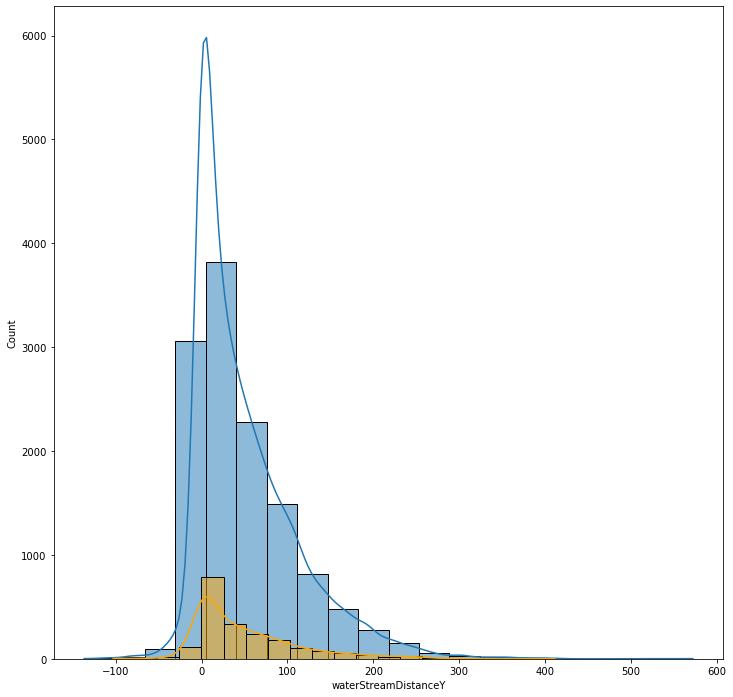

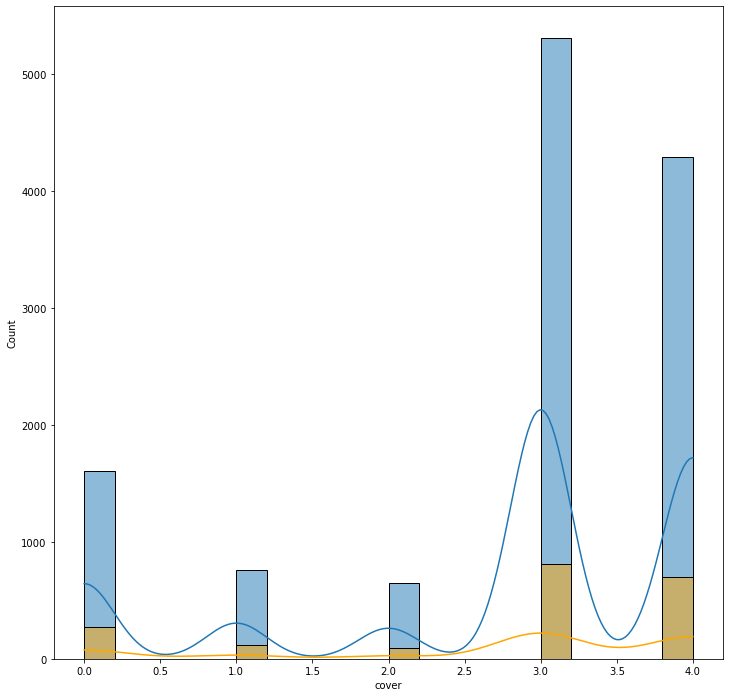

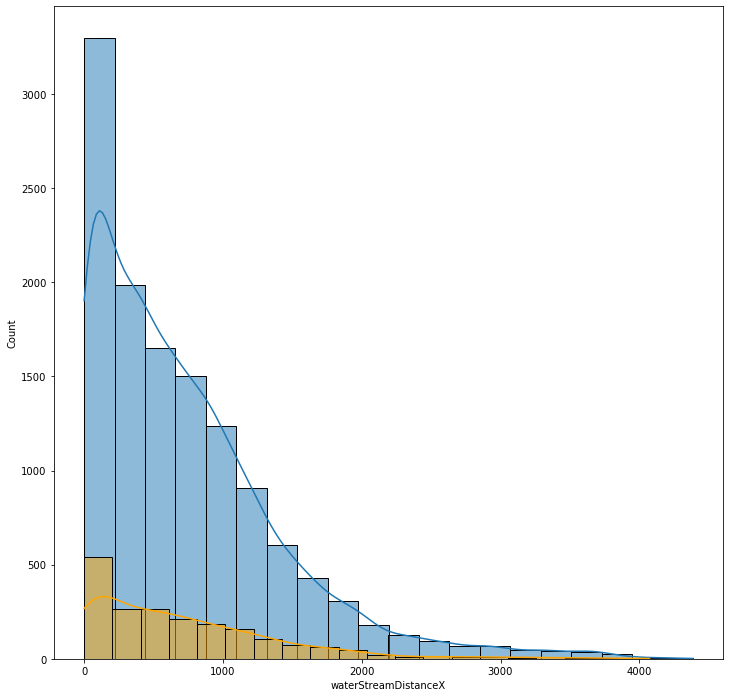

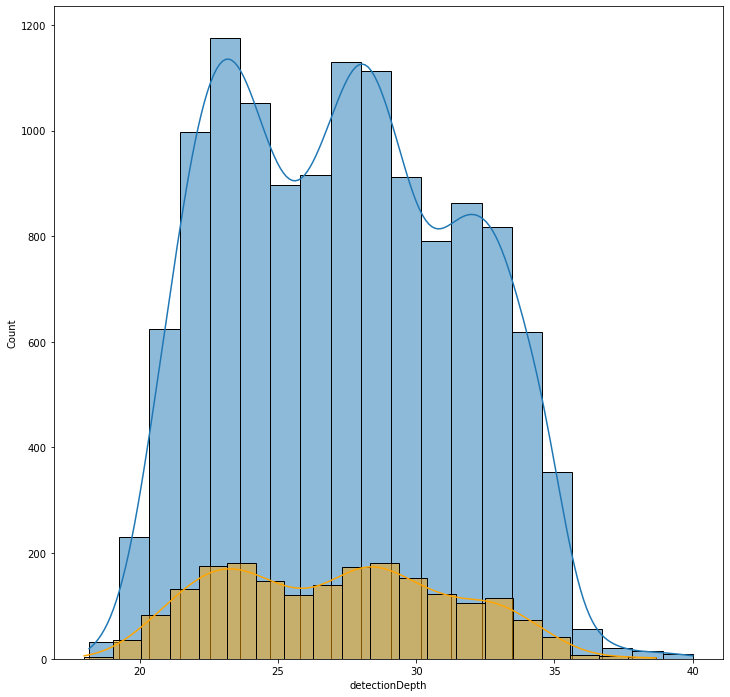

KeyError: 'mineralType'

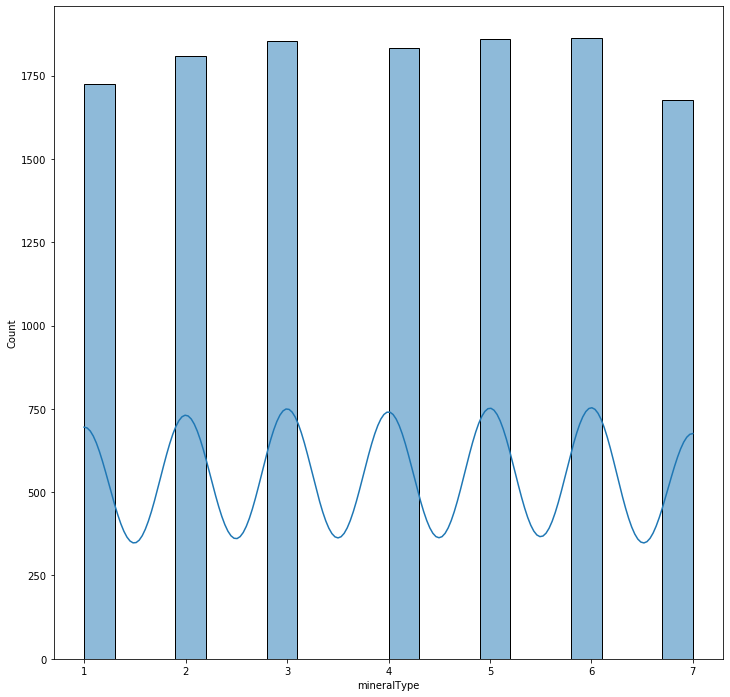

In [53]:
for col in train.columns:
    if train[col].dtype == 'int64' or train[col].dtype == 'float64' and col!='mineralType':
        fig, ax = plt.subplots(figsize=(12,12))
        sns.histplot(train[col], ax=ax, kde=True, bins=20)
        sns.histplot(test[col], ax=ax, kde=True, color='orange', bins=20)
        plt.show()

Se puede apreciar que el conjunto de train y test siguen la misma distribución para cada una de las variables. Tratamos los casos peculiares que hemos encontrado antes en el conjunto de test para corroborar que es así y no existe ningún otro comportamiento atípico.

## Variables categóricas

### Train set

- planetSection:

In [54]:
train['planetSection'].value_counts()

Tatoooine    5502
Hyrule       4007
Mordor       3112
Name: planetSection, dtype: int64

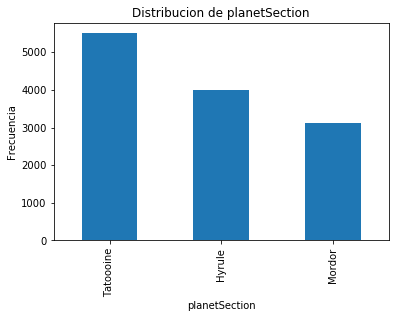

In [55]:
train['planetSection'].value_counts().plot(kind='bar')
plt.title('Distribucion de planetSection')
plt.xlabel('planetSection')
plt.ylabel('Frecuencia')
plt.show()

Se encodean con one-hot encoding ya que no presentan ningún tipo de orden.

- magmaConcentrationDistance:

In [56]:
train['magmaConcentrationDistance'].value_counts()

VERY_CLOSE    7145
CLOSE         4175
MEDIUM         913
FAR            251
VERY_FAR       137
Name: magmaConcentrationDistance, dtype: int64

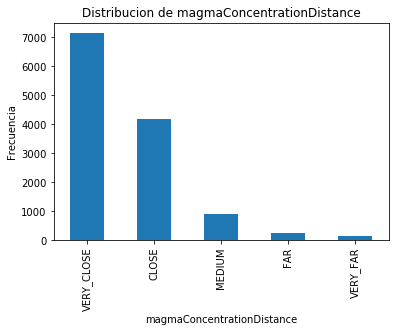

In [57]:
train['magmaConcentrationDistance'].value_counts().plot(kind='bar')
plt.title('Distribucion de magmaConcentrationDistance')
plt.xlabel('magmaConcentrationDistance')
plt.ylabel('Frecuencia')
plt.show()

Necesita un ordinal encoding ya que: VERY_CLOSE < CLOSE < MEDIUM < FAR < VERY_FAR

### Test set

In [58]:
test['planetSection'].value_counts()

Tatoooine    847
Hyrule       668
Mordor       485
Name: planetSection, dtype: int64

In [59]:
train['magmaConcentrationDistance'].value_counts()

VERY_CLOSE    7145
CLOSE         4175
MEDIUM         913
FAR            251
VERY_FAR       137
Name: magmaConcentrationDistance, dtype: int64

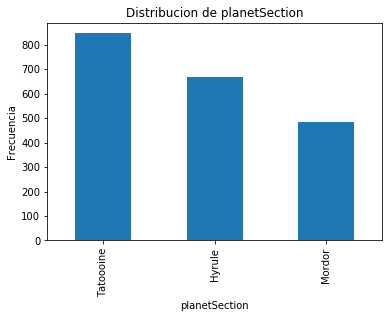

In [60]:
test['planetSection'].value_counts().plot(kind='bar')
plt.title('Distribucion de planetSection')
plt.xlabel('planetSection')
plt.ylabel('Frecuencia')
plt.show()

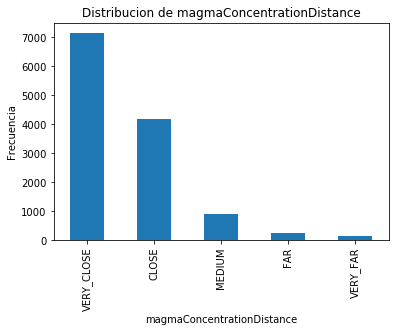

In [61]:
train['magmaConcentrationDistance'].value_counts().plot(kind='bar')
plt.title('Distribucion de magmaConcentrationDistance')
plt.xlabel('magmaConcentrationDistance')
plt.ylabel('Frecuencia')
plt.show()

Las variables categóricas para ambos conjuntos presentan desbalanceo para la variable magmaConcentrationDistance. La distribución en ambos conjuntos es igual.

## Correlación entre variables

### Numéricas

In [62]:
train_corr = train.loc[:, train.columns!='id'].corr()
test_corr = test.loc[:, test.columns!='id'].corr()

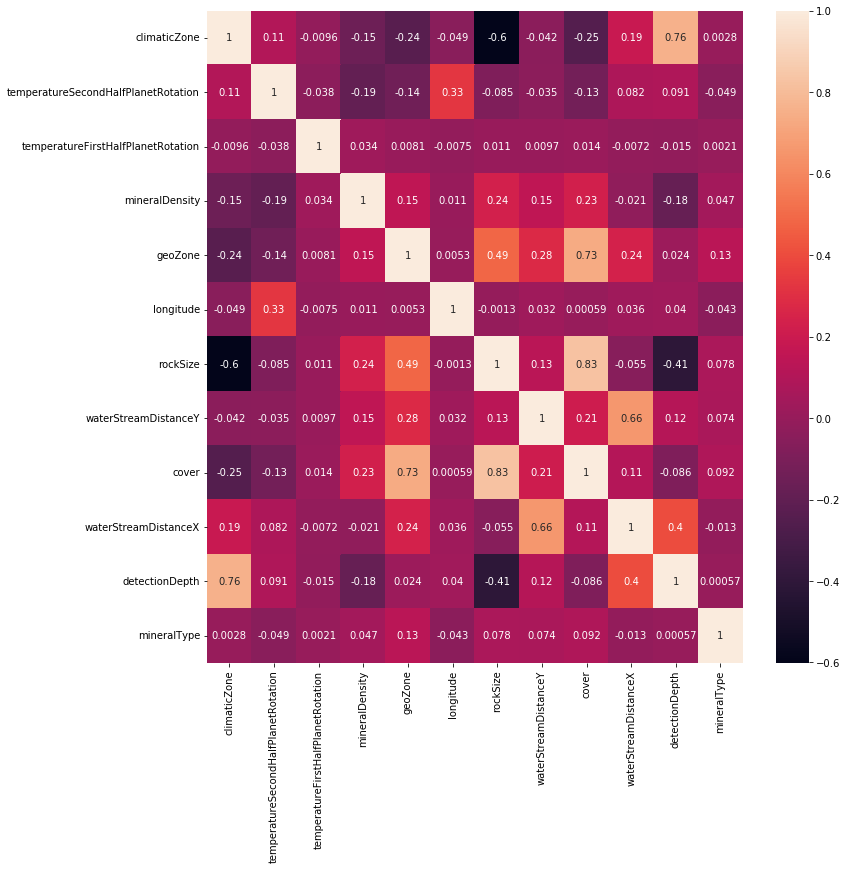

In [63]:
# Vamos a ver si hay alguna correlacion entre las columnas de train
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_corr, annot=True, ax=ax)
plt.show()

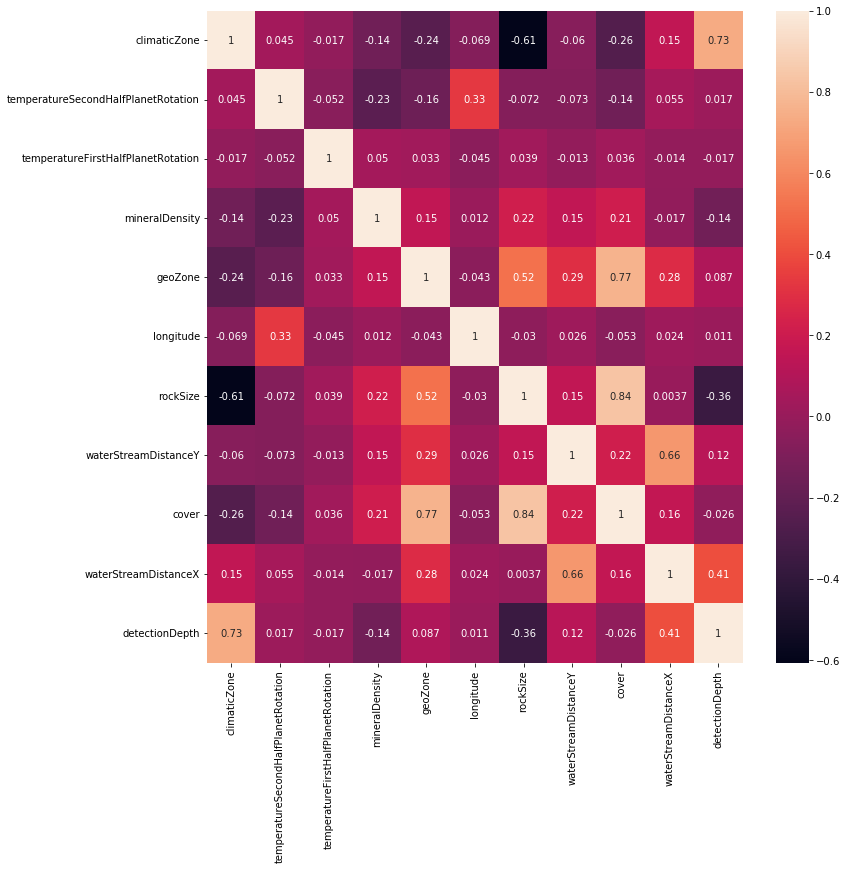

In [64]:
# Vamos a comparar los datos de train con los de test para ver si hay alguna correlacion
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(test_corr, annot=True, ax=ax)
plt.show()

In [65]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [66]:
top_10_abs_corr_train = get_top_abs_correlations(train[numerical_variables], 10)
top_10_abs_corr_test = get_top_abs_correlations(test[[col for col in numerical_variables if col!='id' and col!='mineralType']], 10)

print(top_10_abs_corr_train)
print(top_10_abs_corr_test)

rockSize                             cover                   0.828646
climaticZone                         detectionDepth          0.759931
geoZone                              cover                   0.731252
waterStreamDistanceY                 waterStreamDistanceX    0.657091
climaticZone                         rockSize                0.601102
geoZone                              rockSize                0.485599
rockSize                             detectionDepth          0.410030
waterStreamDistanceX                 detectionDepth          0.402290
temperatureSecondHalfPlanetRotation  longitude               0.327550
geoZone                              waterStreamDistanceY    0.278107
dtype: float64
rockSize                             cover                   0.836418
geoZone                              cover                   0.766259
climaticZone                         detectionDepth          0.730946
waterStreamDistanceY                 waterStreamDistanceX    0.656575
clima

### Categóricas

In [67]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def association_matrix(df, columns):
    association_matrix = pd.DataFrame(index=columns, columns=columns)
    
    for index, column in product(columns, columns):
        association_matrix.loc[index, column] = theil_u(df[index], df[column])
    association_matrix = association_matrix.astype(float)
    return association_matrix

In [68]:
categorical_features_association = association_matrix(train, categorical_variables + ['climaticZone', 'geoZone', 'rockSize', 'cover', 'mineralType'])

In [69]:
# climaticZone                           12621 non-null int64
# planetSection                          12621 non-null object
# geoZone                                12621 non-null int64
# rockSize                               12621 non-null int64
# cover                                  12621 non-null int64
# magmaConcentrationDistance             12621 non-null object
# mineralType                            12621 non-null int64

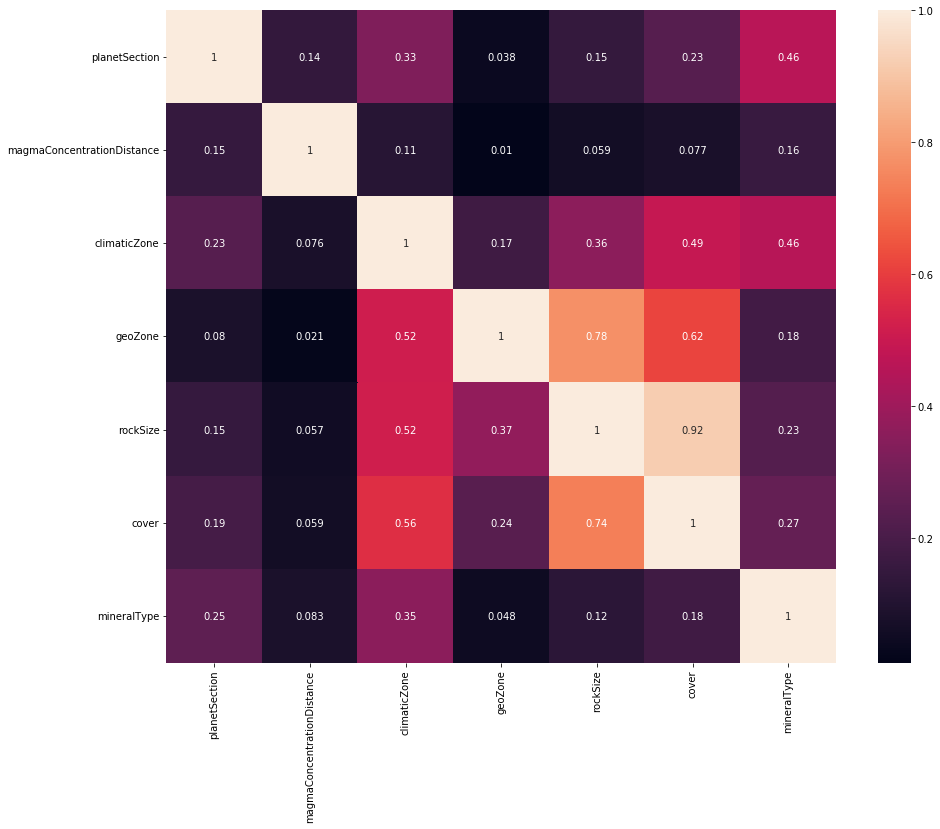

In [70]:
# mirar solo filas y columnas 1 y 2
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(categorical_features_association, annot=True, ax=ax)
plt.yticks(rotation=0) 
plt.show()

Atendiendo a las filas y columnas 1 y 2 que se corresponden con los coeficientes de las variables categóricas que estamos estudiando (de las demás ya tenemos sus relaciones mediante el coeficiente de Pearson) vemos que no hay correlación entre estas ni con las demás (0 <= Uncertainty coefficient <= 1).

### Categóricas vs Numéricas

In [71]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)

    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))

    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def correlation_ratio_matrix(df, categorical_columns, numeric_columns):
    correlation_ratio_matrix = pd.DataFrame(index=categorical_columns, columns=numeric_columns)
    
    for categorical_column, numeric_column in product(categorical_variables, numeric_columns):
        modified_df = df
        if df[categorical_column].any():
            modified_df = modified_df.dropna(subset=[categorical_column])
        if df[numeric_column].any():
            modified_df = modified_df.dropna(subset=[numeric_column])
            
        correlation_ratio_matrix.loc[categorical_column, numeric_column] = correlation_ratio(modified_df[categorical_column].values, modified_df[numeric_column].values)

    correlation_ratio_matrix = correlation_ratio_matrix.astype(float)
    return correlation_ratio_matrix

In [72]:
correlation_ratio_matrix = correlation_ratio_matrix(train, categorical_variables, [col for col in numerical_variables if col!='id'])

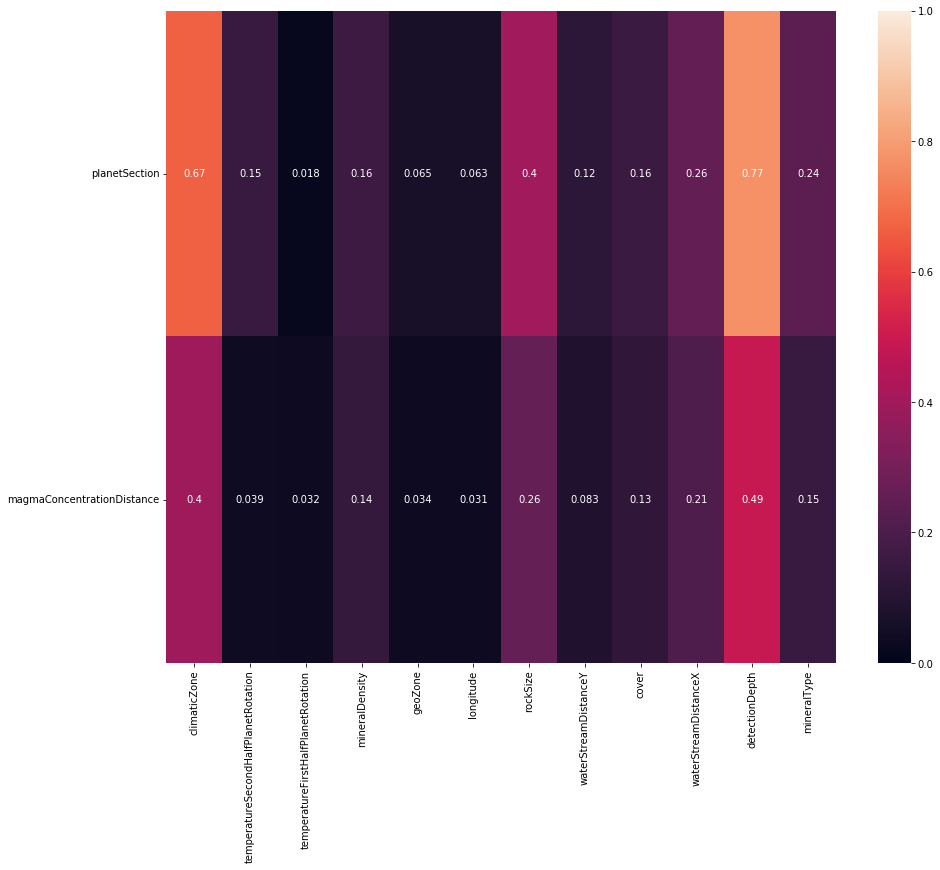

In [73]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(correlation_ratio_matrix, annot=True, ax=ax, vmin=0, vmax=1)
plt.yticks(rotation=0) 
plt.show()

Existe cierta correlación entre las variables climaticZone, detectionDepth y planetSection.

### Plots para variables correlacionadas

In [74]:
# NUMERICAS
# rockSize                             cover                   0.828646
# climaticZone                         detectionDepth          0.759931
# geoZone                              cover                   0.731252
# waterStreamDistanceY                 waterStreamDistanceX    0.657091
# climaticZone                         rockSize                0.601102
# geoZone                              rockSize                0.485599

# CATEGORICAS vs NUMERICAS
# planetSection                        climaticZone            0.67
# planetSection                        detectionDepth          0.77

In [75]:
# climaticZone                           2000 non-null int64
# planetSection                          2000 non-null object
# geoZone                                2000 non-null int64
# rockSize                               2000 non-null int64
# cover                                  2000 non-null int64
# magmaConcentrationDistance             2000 non-null object

In [76]:
correlated_variables = ['rockSize', 'cover', 'climaticZone', 'detectionDepth', 'geoZone', 'waterStreamDistanceY', 'waterStreamDistanceX', 'planetSection']

Hue: rockSize


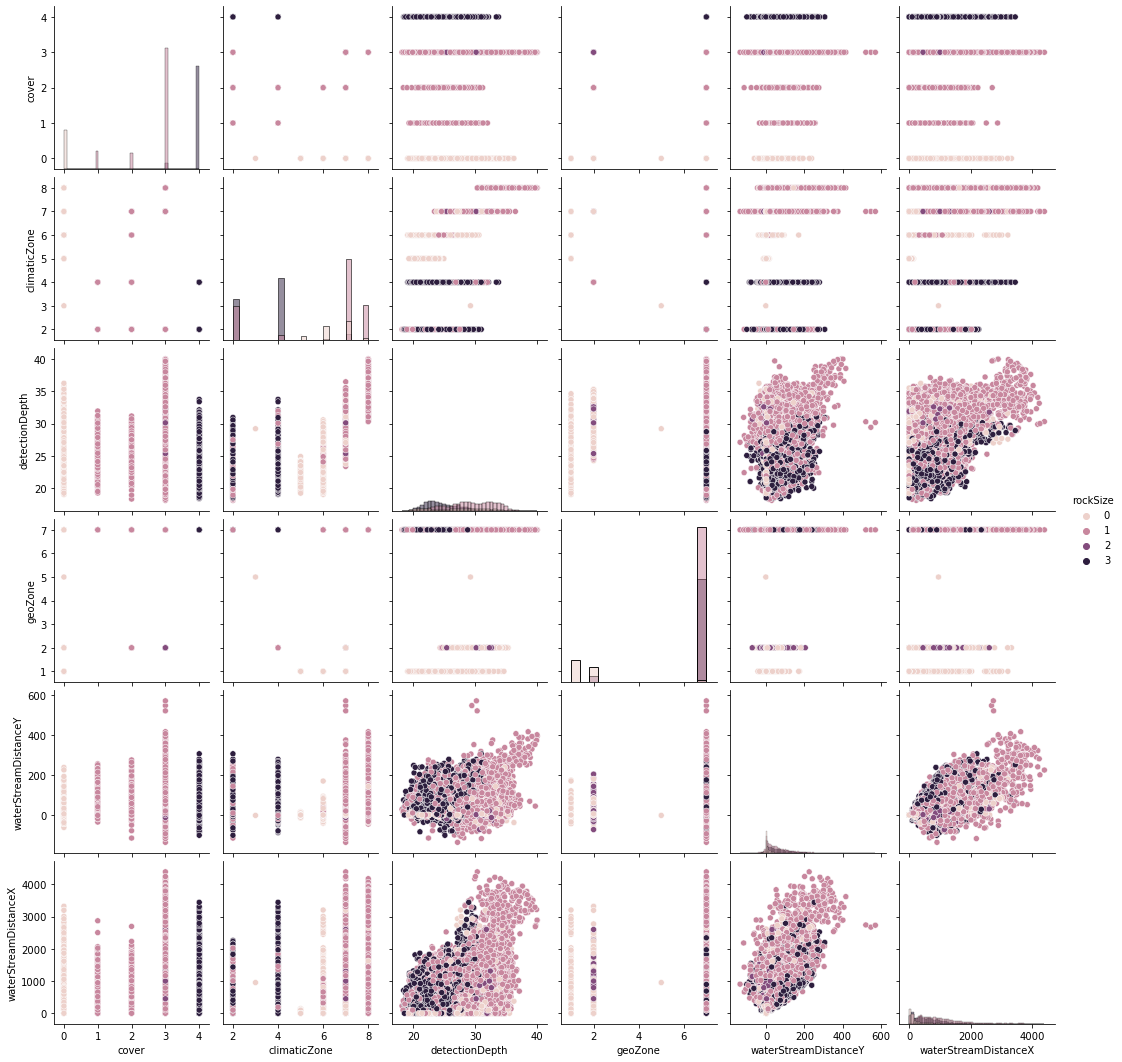

Hue: cover


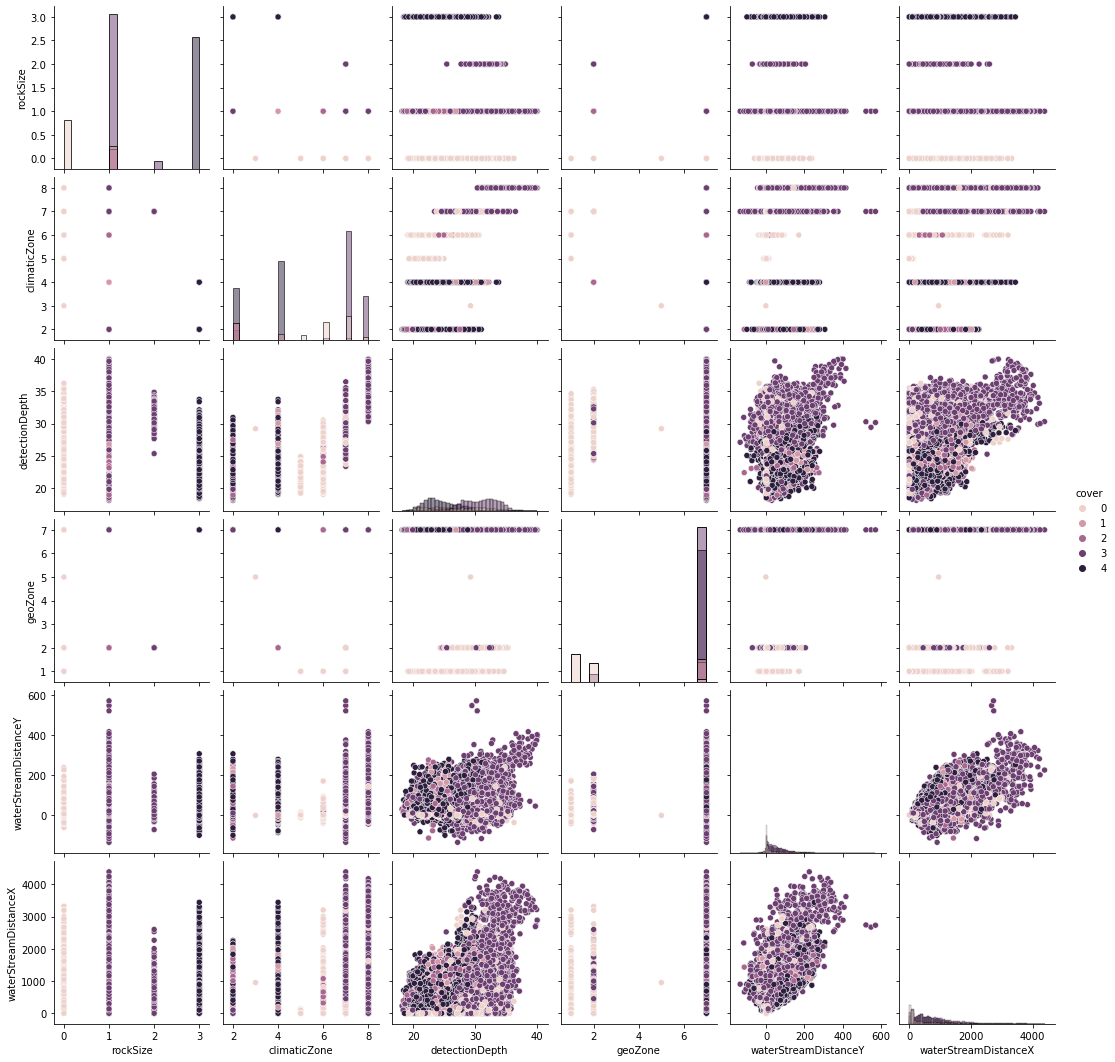

Hue: climaticZone


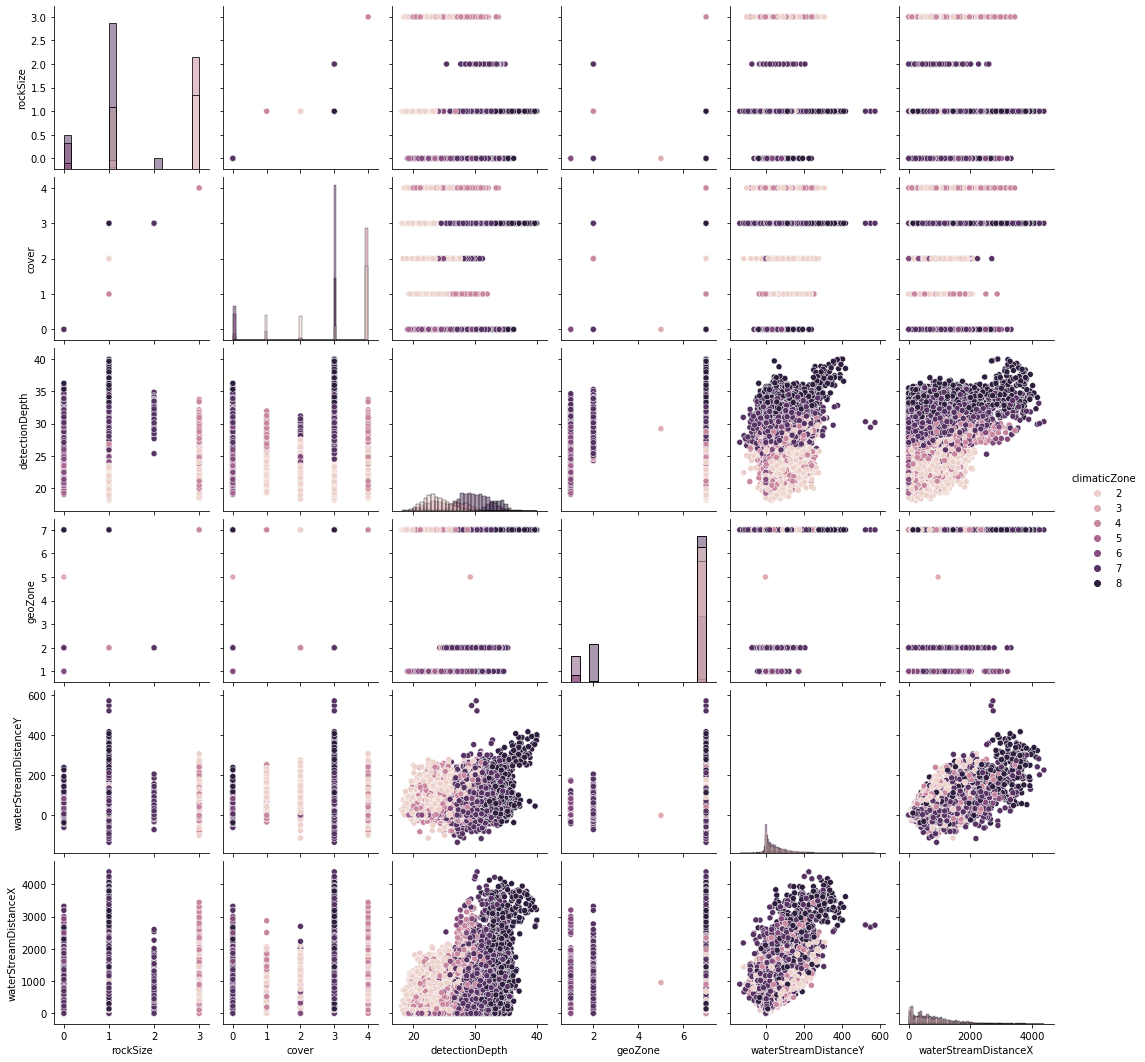

Hue: geoZone


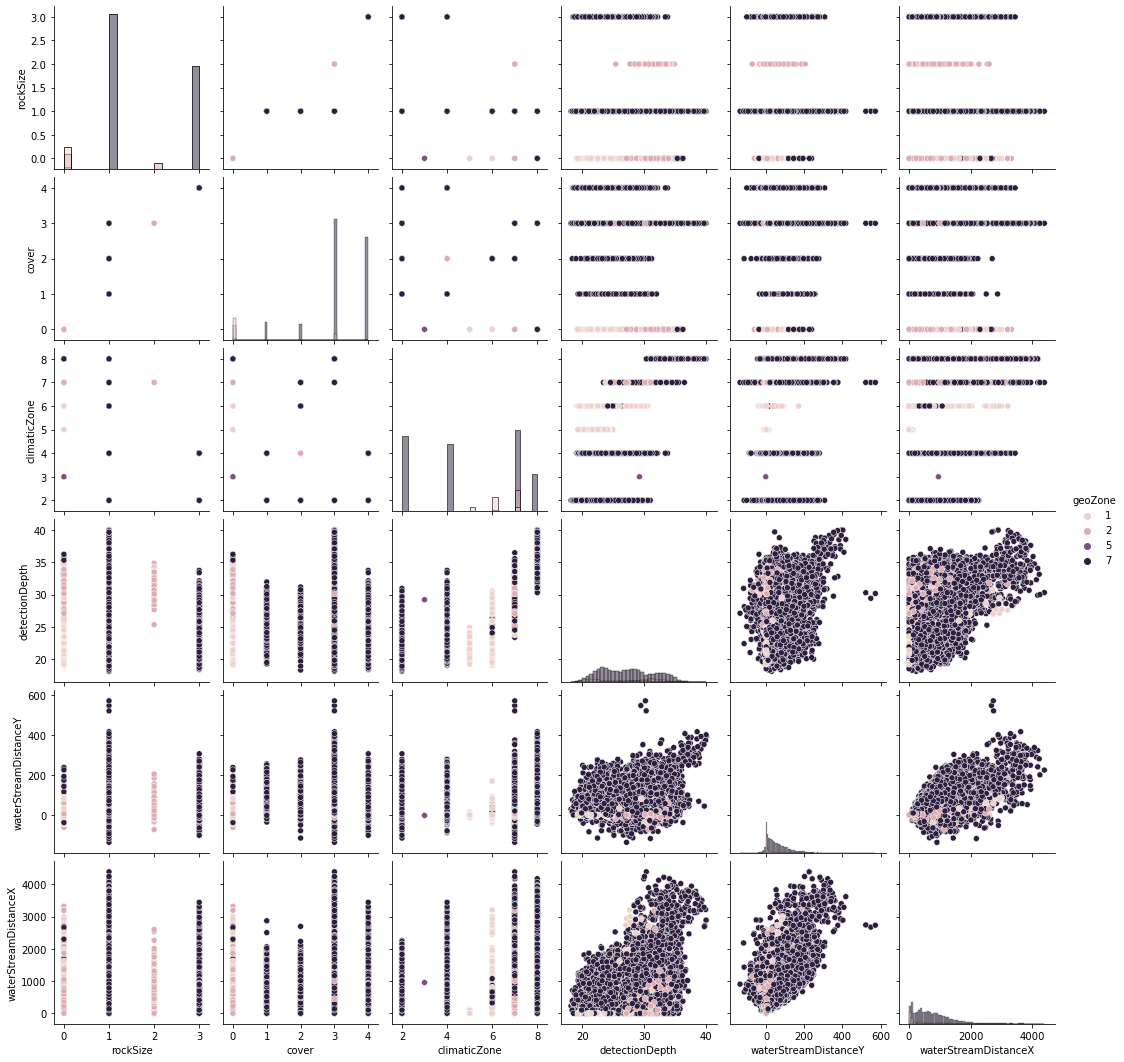

Hue: planetSection


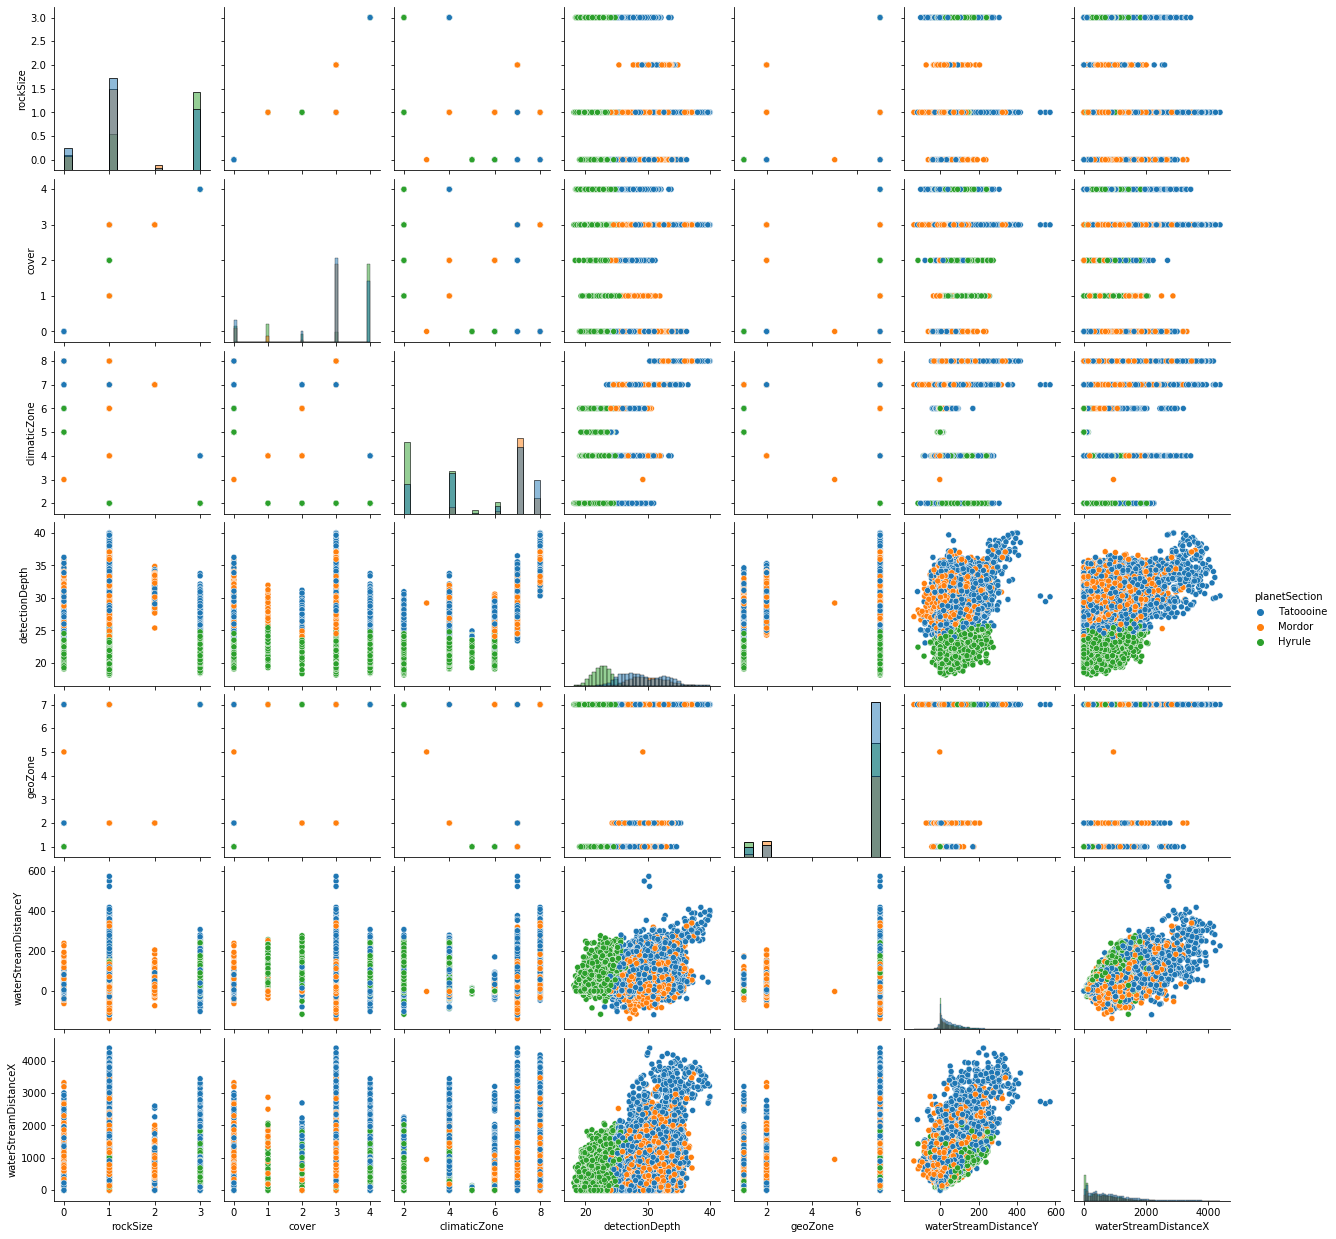

In [77]:
for hue_col in ['rockSize', 'cover', 'climaticZone', 'geoZone', 'planetSection']:
    print(f'Hue: {hue_col}')
    sns.pairplot(train[correlated_variables], diag_kind='hist', hue=hue_col)
    plt.show()

In [78]:
incorrelated_variables = list(train.columns.difference(correlated_variables + ['id', 'mineralType']).values)

Hue: rockSize


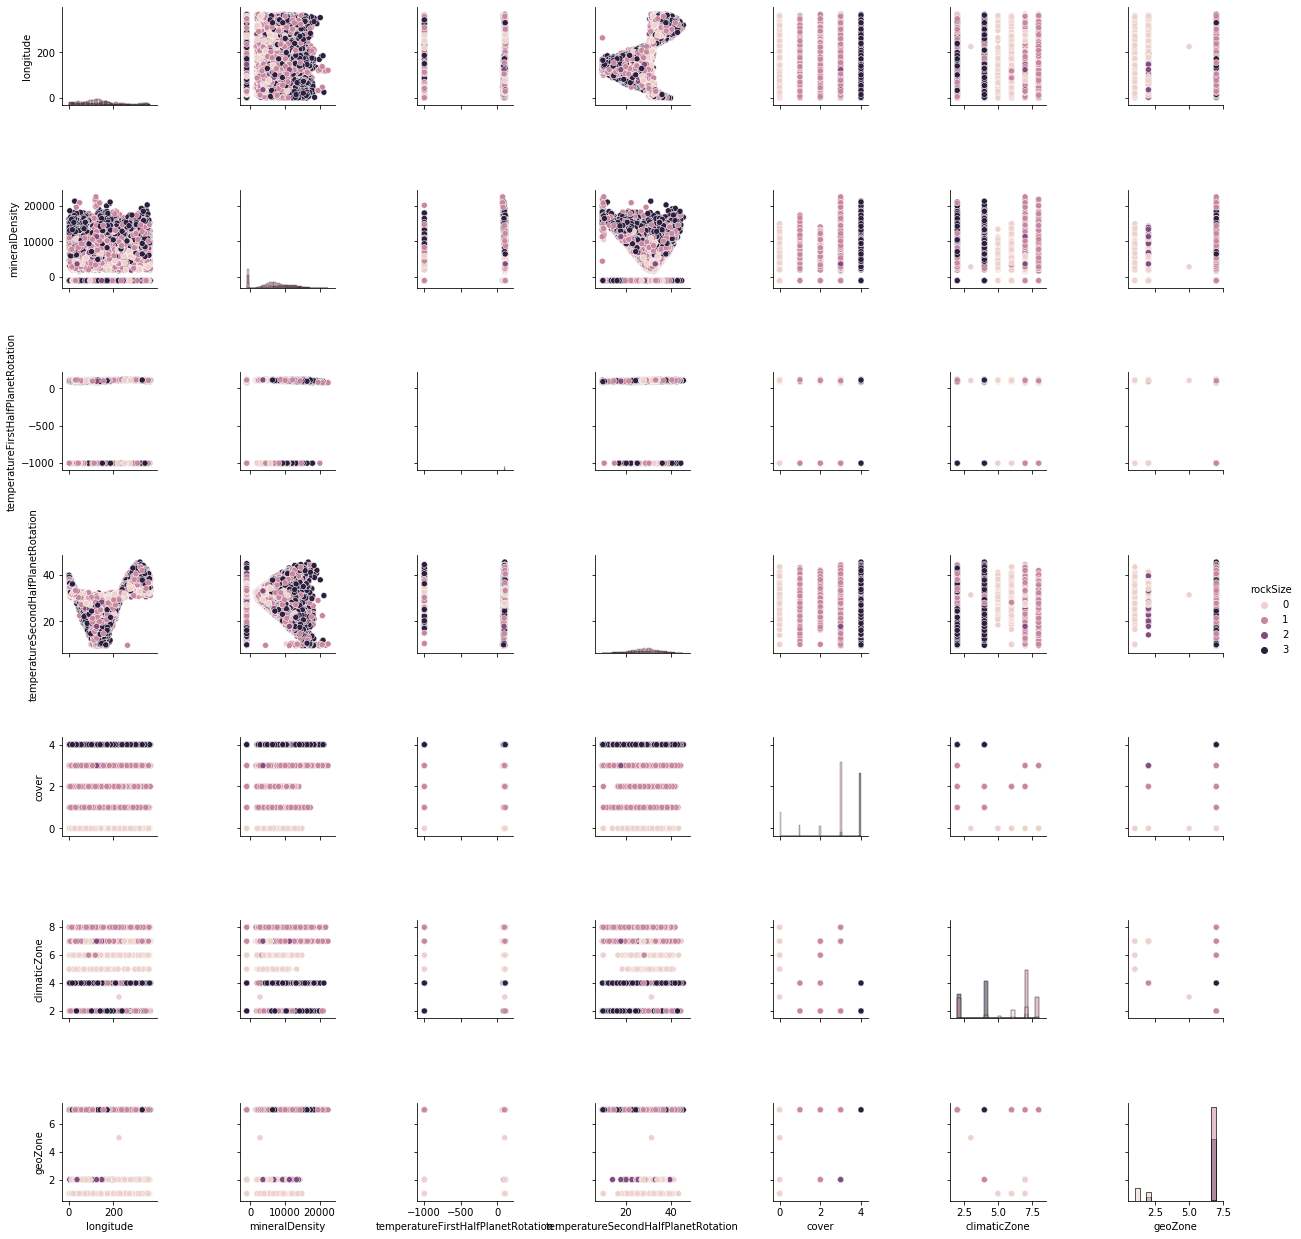

Hue: cover


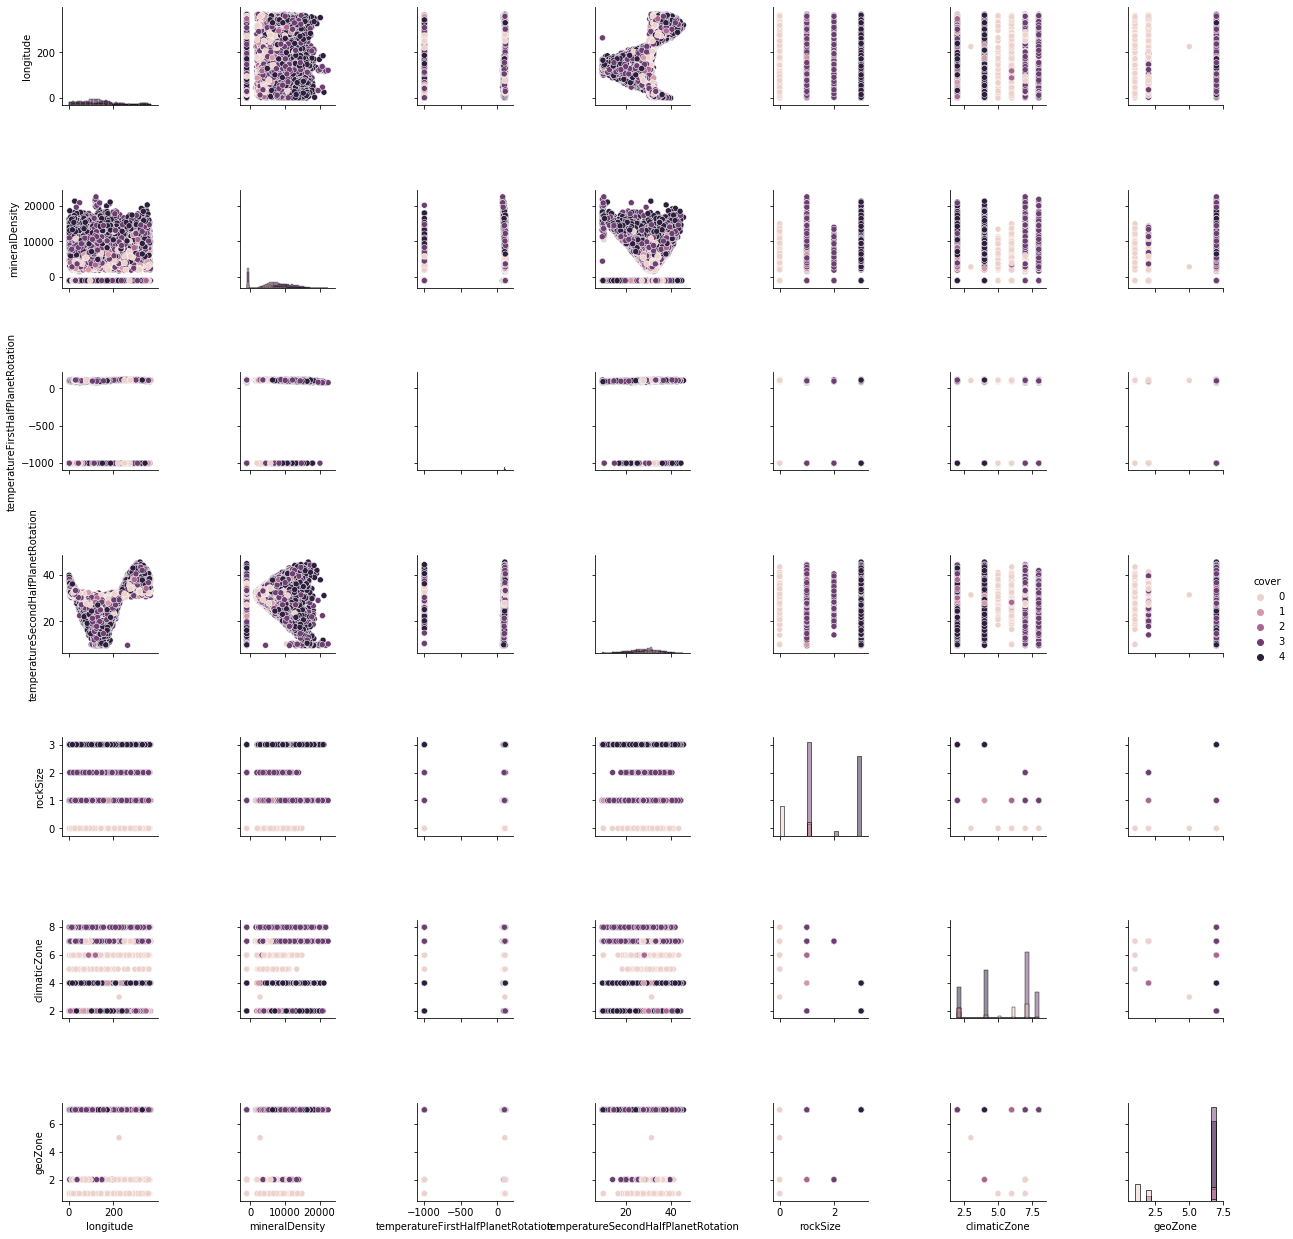

Hue: climaticZone


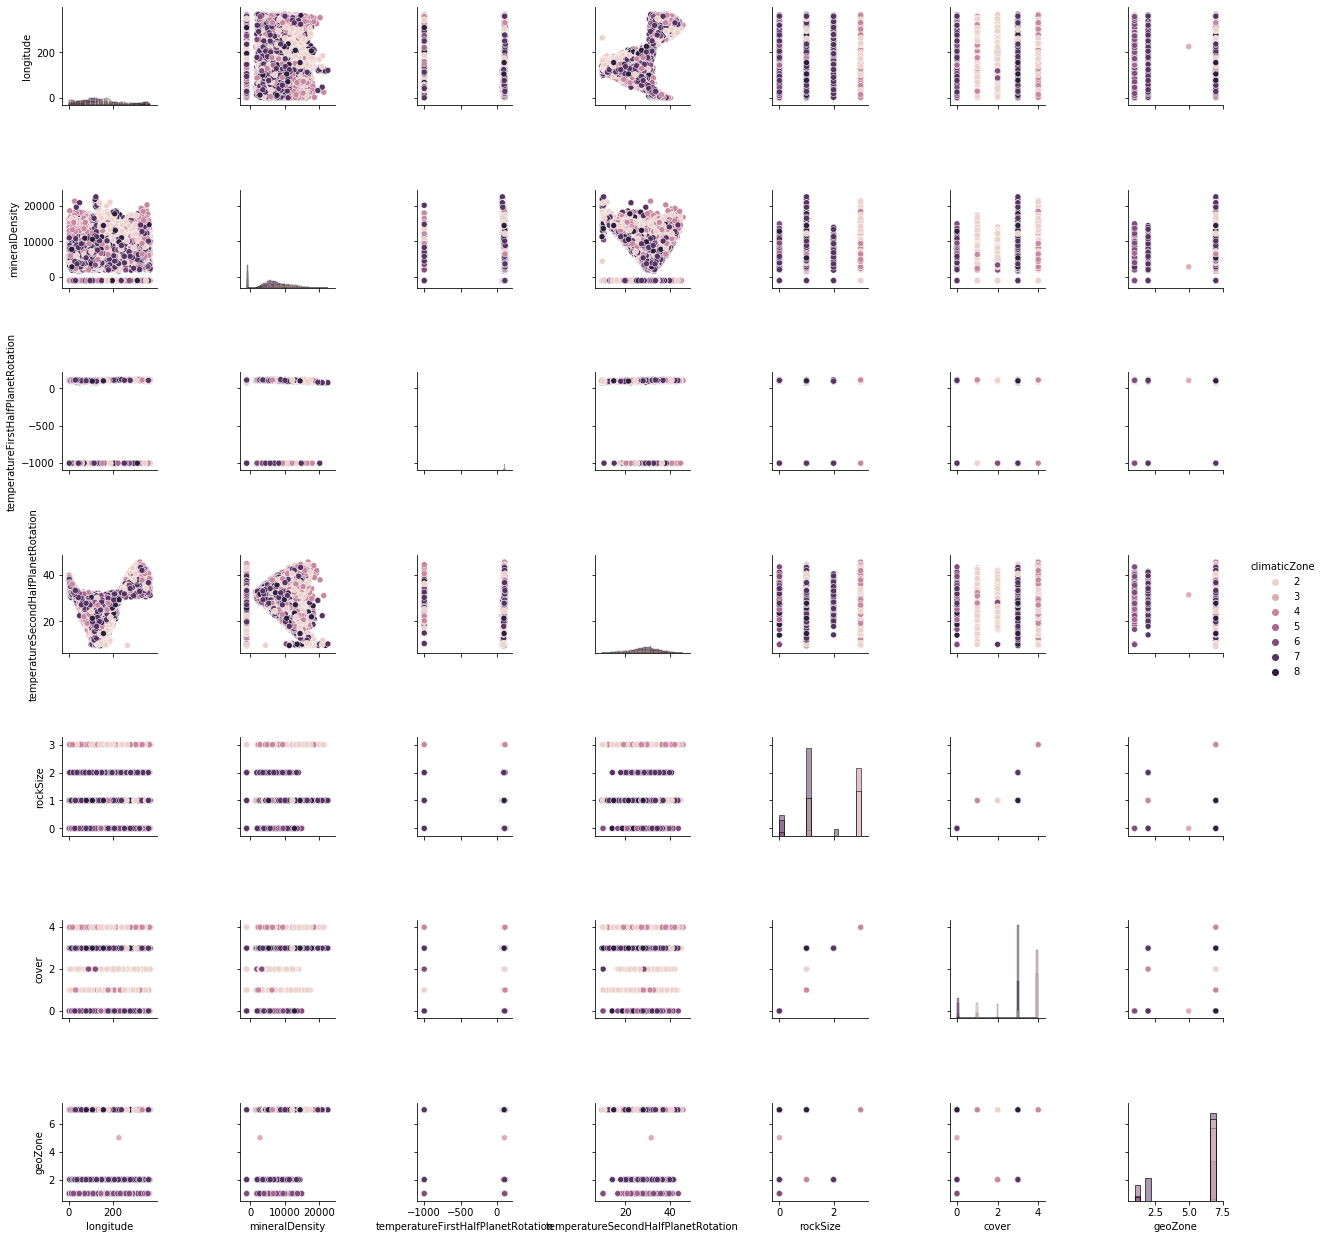

Hue: geoZone


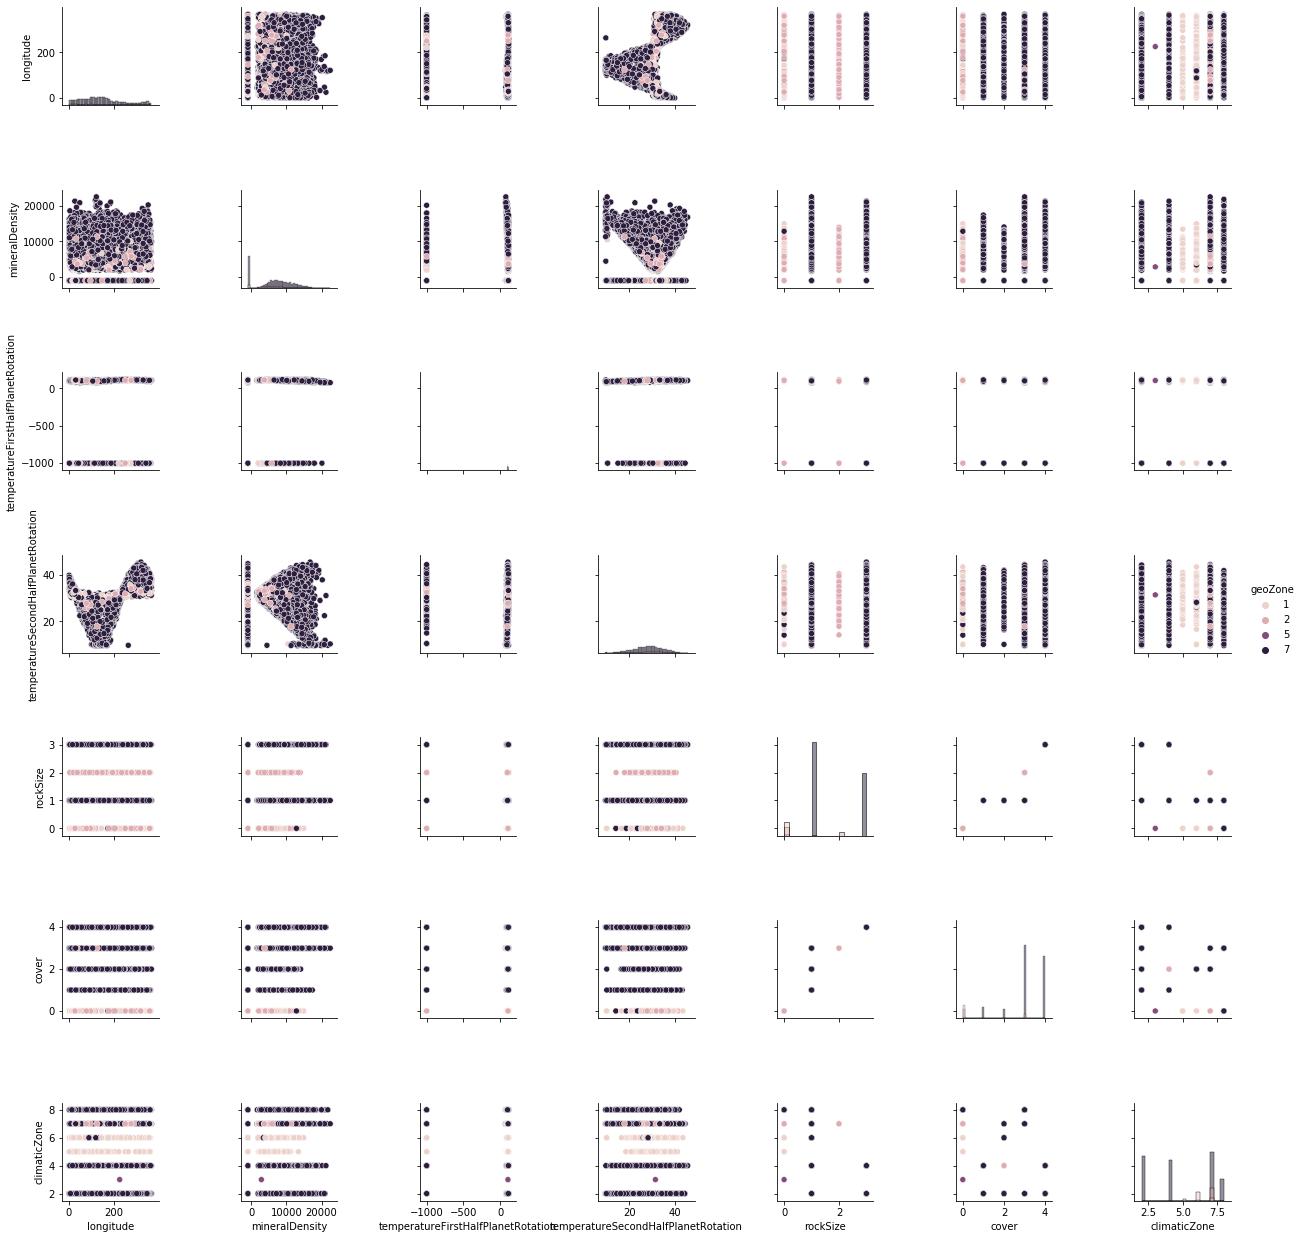

Hue: planetSection


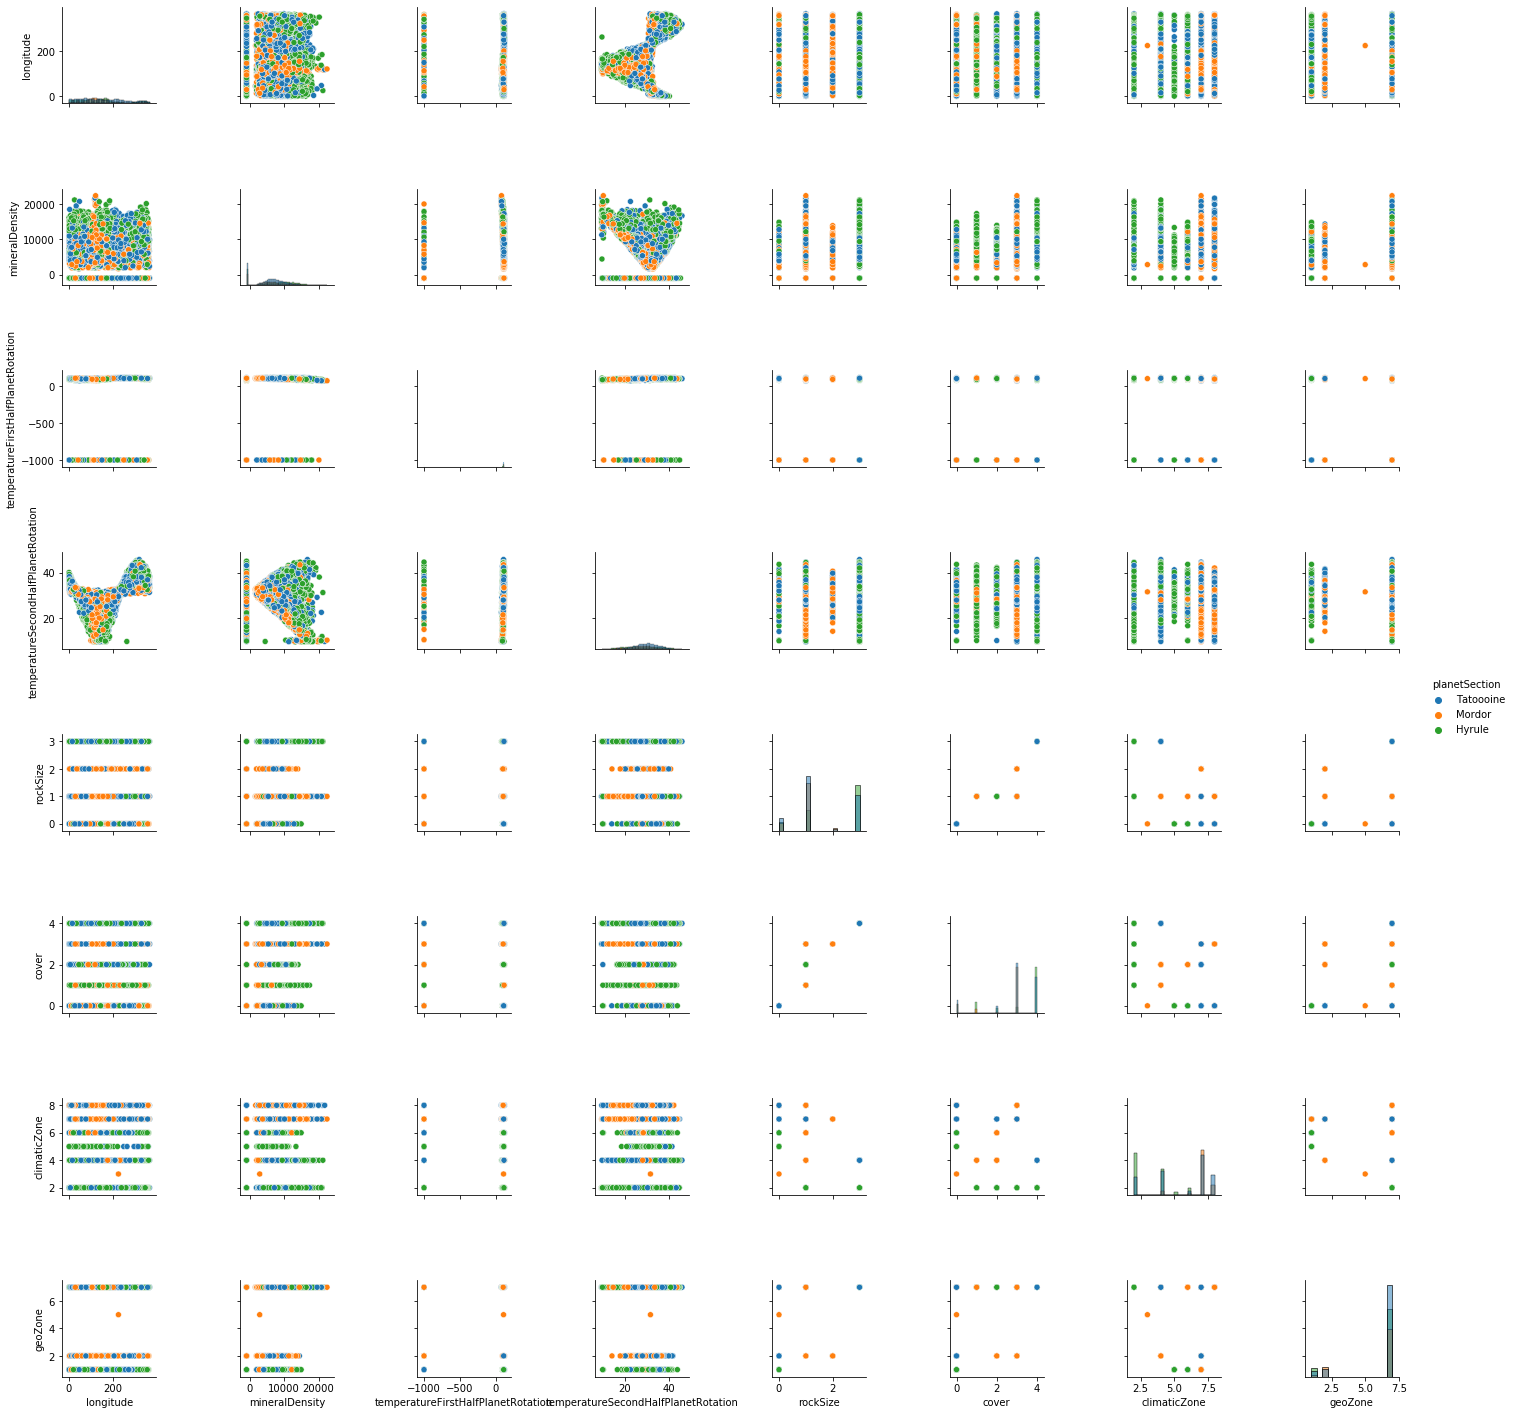

In [79]:
for hue_col in ['rockSize', 'cover', 'climaticZone', 'geoZone', 'planetSection']:
    print(f'Hue: {hue_col}')
    sns.pairplot(train[incorrelated_variables + ['rockSize', 'cover', 'climaticZone', 'geoZone', 'planetSection']], diag_kind='hist', hue=hue_col)
    plt.show()

Viendo las gráficas asociadas a las variables con correlación se pueden apreciar agrupamientos para las otras variables (ya sean numéricas o categóricas). Esto puede ser un factor que nos permita encontrar un modelo que consiga clasificar más fácilmente.

De igual modo, para las incorreladas se ve como esta relación se pierde.

### Plots valores atípicos -999.0

In [80]:
outliers_temperatureFirstHalfPlanetRotation = train[train['temperatureFirstHalfPlanetRotation'] == -999.0]
outliers_mineralDensity = train[train['mineralDensity'] == -999.0]
outliers_temperatureFirstHalfPlanetRotation_mineralDensity = train[(train['temperatureFirstHalfPlanetRotation'] == -999.0) & (train['mineralDensity'] == -999.0)]

In [81]:
outliers_temperatureFirstHalfPlanetRotation

climaticZone planetSection  temperatureSecondHalfPlanetRotation  \
0                 4     Tatoooine                                 28.9   
87                7     Tatoooine                                 24.9   
89                2     Tatoooine                                 22.9   
96                8     Tatoooine                                 35.0   
105               2        Hyrule                                 32.0   
...             ...           ...                                  ...   
12545             2        Hyrule                                 36.3   
12555             7        Mordor                                 25.0   
12558             2        Hyrule                                 25.2   
12566             4     Tatoooine                                 20.3   
12590             7        Mordor                                 30.4   

       temperatureFirstHalfPlanetRotation  mineralDensity  geoZone  longitude  \
0                                  -999.0         4617.64        7      71.86   
87                                 -999.0         6482.25        7      97.76   
89                                 -999.0         -999.00        7     184.87   
96                                 -999.0         7328.77        7       4.06   
105                                -999.0         2316.98        7       9.17   
...                                   ...             ...      ...        ...   
12545                              -999.0         8461.31        7     342.57   
12555                              -999.0         -999.00        7     141.81   
12558                              -999.0        10666.21        7     187.18   
12566                              -999.0         9339.19        7     150.76   
12590                              -999.0         8291.16        7      42.74   

       rockSize  waterStreamDistanceY  cover magmaConcentrationDistance  \
0             3                 16.76      4                 VERY_CLOSE   
87            1                 12.55      3                      CLOSE   
89            3                 37.88      4                     MEDIUM   
96            1                 53.90      3                 VERY_CLOSE   
105           1                 52.85      1                      CLOSE   
...         ...                   ...    ...                        ...   
12545         3                 58.91      4                 VERY_CLOSE   
12555         1                 14.83      3                      CLOSE   
12558         3                 37.16      4                 VERY_CLOSE   
12566         3                198.21      4                      CLOSE   
12590         1                 24.55      3                      CLOSE   

       waterStreamDistanceX  detectionDepth  mineralType     id  
0                    857.70           27.49            5      0  
87                   293.99           27.57            3     87  
89                   424.14           27.08            3     89  
96                  1622.55           33.53            7     96  
105                 1108.11           23.90            3    105  
...                     ...             ...          ...    ...  
12545                541.07           22.25            6  12545  
12555                427.05           29.57            2  12555  
12558                315.71           23.04            3  12558  
12566               1969.09           28.21            3  12566  
12590               1236.69           30.32            5  12590  

[626 rows x 15 columns]

- temperatureFirstHalfPlanetRotation:

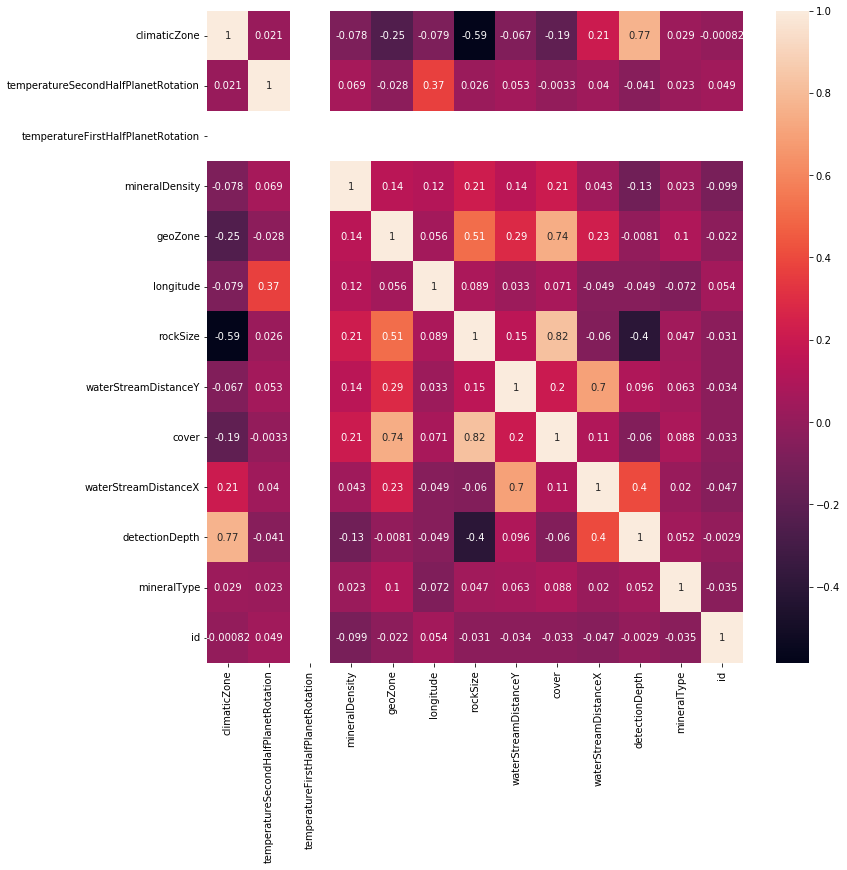

In [82]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(outliers_temperatureFirstHalfPlanetRotation[numerical_variables].corr(), annot=True, ax=ax)
plt.show()

In [83]:
categorical_features_association = association_matrix(outliers_temperatureFirstHalfPlanetRotation, categorical_variables + ['climaticZone', 'geoZone', 'rockSize', 'cover', 'mineralType'])

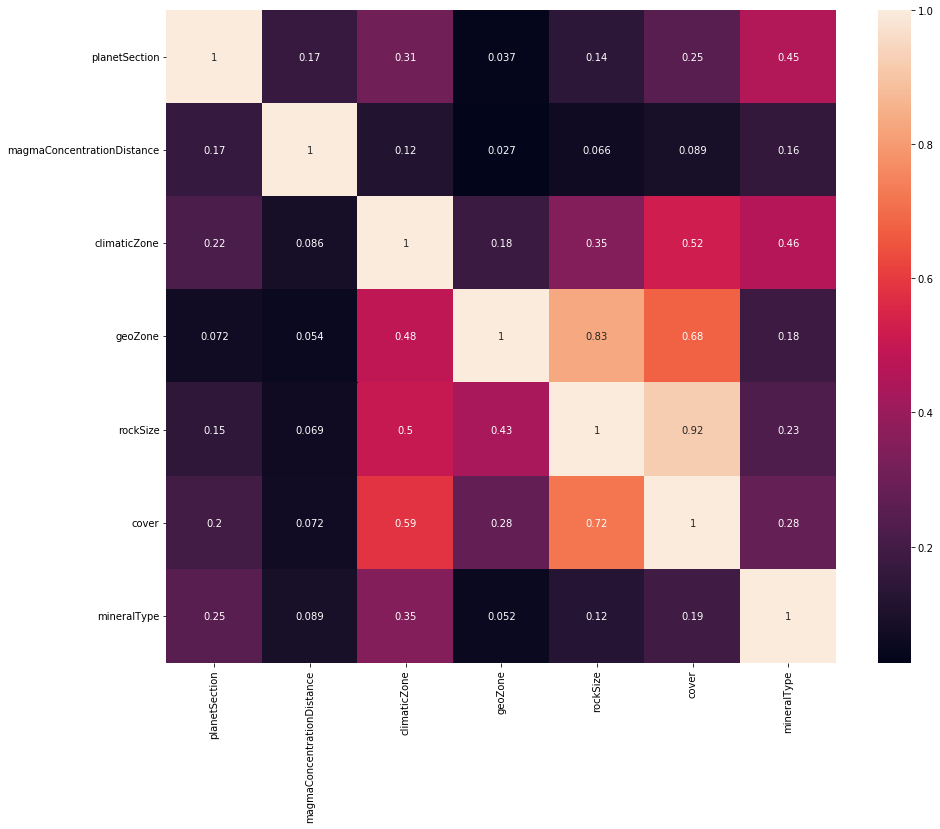

In [84]:
# mirar solo filas y columnas 1 y 2
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(categorical_features_association, annot=True, ax=ax)
plt.yticks(rotation=0) 
plt.show()

- mineralDensity:

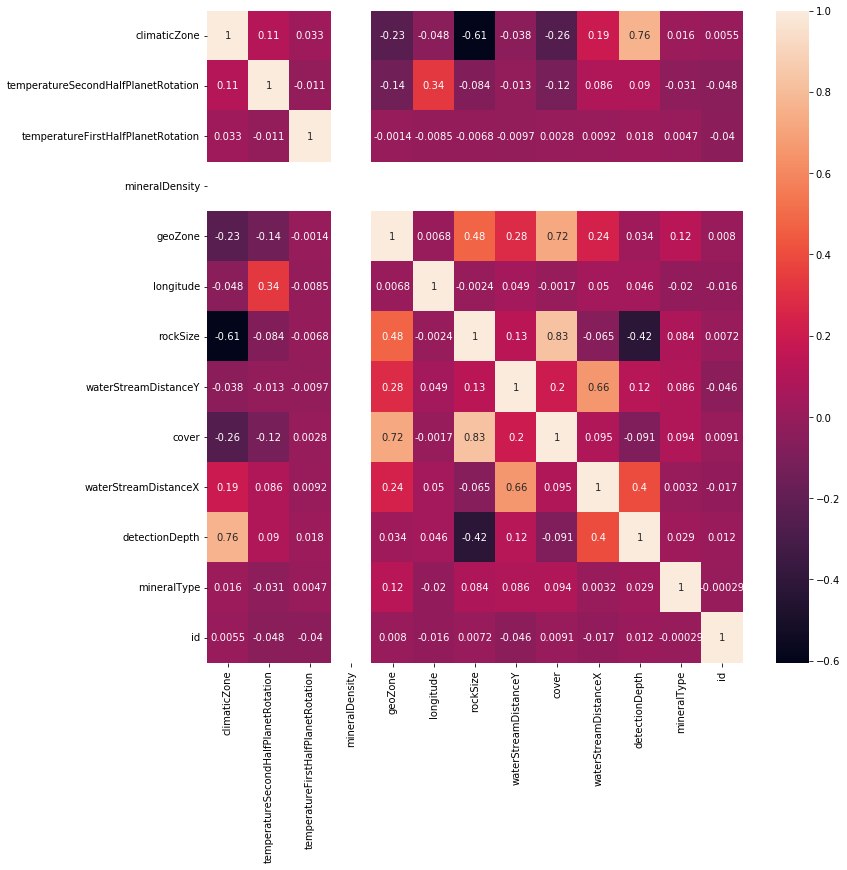

In [85]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(outliers_mineralDensity[numerical_variables].corr(), annot=True, ax=ax)
plt.show()

In [86]:
categorical_features_association = association_matrix(outliers_mineralDensity, categorical_variables + ['climaticZone', 'geoZone', 'rockSize', 'cover', 'mineralType'])

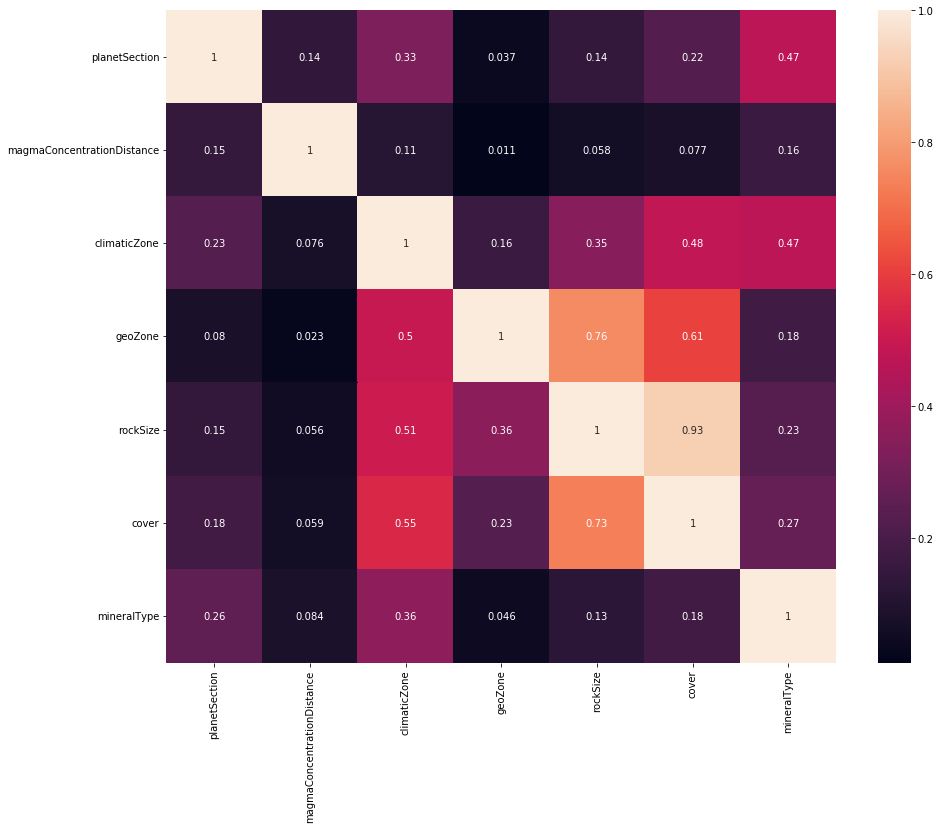

In [87]:
# mirar solo filas y columnas 1 y 2
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(categorical_features_association, annot=True, ax=ax)
plt.yticks(rotation=0) 
plt.show()

- temperatureFirstHalfPlanetRotation y mineralDensity:

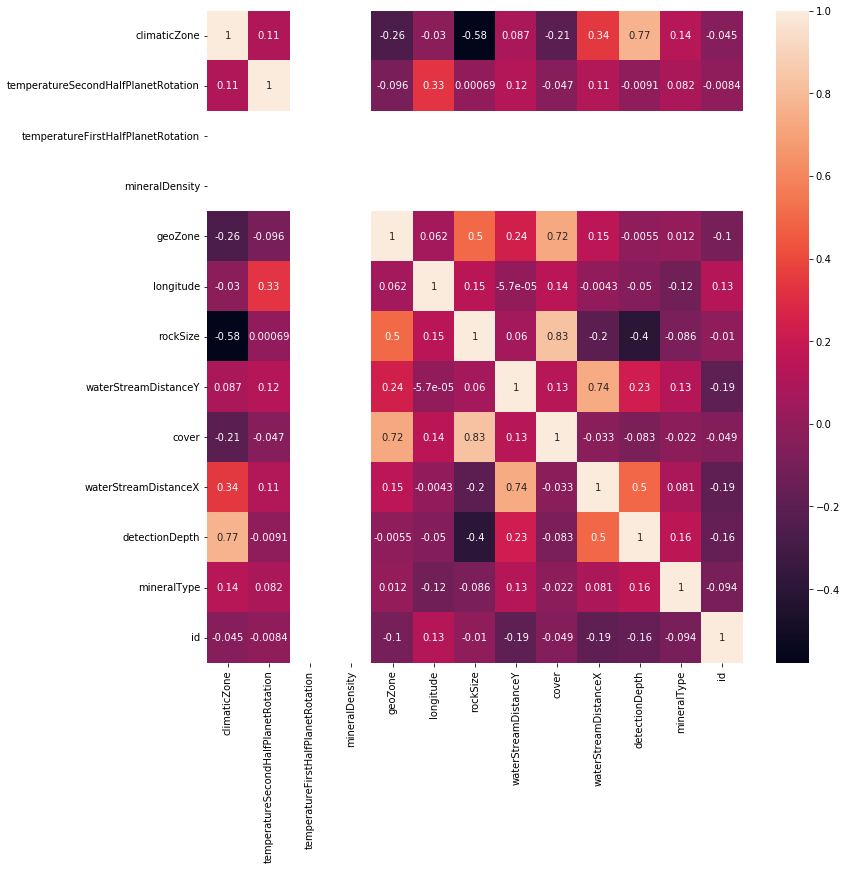

In [88]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(outliers_temperatureFirstHalfPlanetRotation_mineralDensity[numerical_variables].corr(), annot=True, ax=ax)
plt.show()

In [89]:
TERMINAR RESTO DE CORRELACIONES

SyntaxError: invalid syntax (370061462.py, line 1)

En el caso de las entradas para las dos variables con -999.0 aumenta la correlación de  con waterStreamDistanceX con respecto a climateZone.

No hay otras disminuciones ni incrementos significativos.

## Conclusiones
Vamos por orden de las columnas y las modificaciones que a simple vista vemos que debemos realizar.

- temperatureFirstHalfPlanetRotation # Es una variable numérica, deberíamos cambiar las unidades de la temperatura de Farenheit a Celsius.
- temperatureSecondHalfPlanetRotation # Es una variable numérica, nada. Ya están en Celsius.
- waterStreamDistanceX # Es una variable numérica, deberíamos cambiar las unidades de la distancia de feet a metros.
- waterStreamDistanceY # Es una variable numérica, nada. Ya están en metros.
- planetSection # Es una variable categórica, habrá que hacer One-Hot Encoding.
- cover # Es una variable categórica, a priori hay que hacer One-Hot Encoding, además si el valor es 0, no hay cover. (OJO con que nos dice que hay 5 categorías pero la cat nº 5 no aparece ni en test ni train)
- climaticZone # Es una variable categórica, hay orden natural, por lo que hay que hacer Integer Encoding.
- geoZone # Es una variable categórica, no hay orden natural, por lo que hay que hacer One-Hot Encoding. Los valores son: 1, 2, 5, 7. Pero resulta que solo tenemos 1 dato de la categoría 5. ¿Deberíamos descartarla?
- rockSize # Es una variable numérica, si el valor es 0, no hay rock size.
- magmaConcentrationDistance # Es una variable categórica con 5 categorías, VERY_CLOSE, CLOSE, MEDIUM, FAR, VERY_FAR. Podríamos hacer One-Hot Encoding o Integer Encoding si queremos usar el orden natural, pero no sabemos la relación exacta entre las categorías.
- mineralDensity # Es una variable numérica, nada, ya está en kg/m3.
- detectionDepth # Es una variable numérica, deberíamos cambiar las unidades de la distancia de kilometros a metros solo si queremos "normalizar" la variable con las demás que están en metros, si se normalizan todas las variables, esto no sería necesario.
- longitude # Es una variable numérica, en principio no hay que hacer nada, pero me llama la atención que hay bastantes valores por encima de los 360 grados, ¿Estará esto en el rango de 0 a 360?
- mineralType # Es una variable categórica y el target, hay que hacer One-Hot Encoding.

Dudas/Notas:

- magmaConcentrationDistance: Si usamos one hot nos quitamos de problemas, pero podemos hacer pruebas con los 2.
- detectionDepth: Aun normalizando lo pasaria a metros por tener todo en el mismo contexto.

Integer encoding = Ordinal encoding (sklearn)

TODO:
- Mirar PCA